In [1]:
import pandas as pd

In [2]:
data = pd.read_excel("Homestay.xlsx")
pd.set_option('display.max_columns', None)
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,1.0,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,1.0,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaT,t,t,NaN,2015-04-19,f,NaT,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,1.0,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


**Understanding about the Data**

In [3]:
print("The total length of the dataset is: ",len(data))

The total length of the dataset is:  74111


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      74111 non-null  int64         
 1   log_price               74111 non-null  float64       
 2   property_type           74111 non-null  object        
 3   room_type               74111 non-null  object        
 4   amenities               74111 non-null  object        
 5   accommodates            74111 non-null  int64         
 6   bathrooms               73911 non-null  float64       
 7   bed_type                74111 non-null  object        
 8   cancellation_policy     74111 non-null  object        
 9   cleaning_fee            74111 non-null  bool          
 10  city                    74111 non-null  object        
 11  description             74105 non-null  object        
 12  first_review            58247 non-null  dateti

In [5]:
data.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   6
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                         10
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

**Observations:**

1) Id and thumbnail_url can be removed because they are irrelavent for us.
2) There are many null values in the day,we have to minimize them with appropriate approaches.

In [6]:
data.drop(columns=['thumbnail_url'], inplace=True)
data.drop(columns=['id'], inplace=True)

**Handling with the null values**

**Dealing with null values in the `bathrooms`,`beds` and `bedrooms` columns.**

Since the number of null values for;
bathrooms ---> 200
beds      ---> 131
bedrooms  --->  91

We can replace them with the **mode** of their particular column

In [7]:
# Replacing their "NAN" values with their mode.

mode_bathrooms = data['bathrooms'].mode()[0]  
data['bathrooms'].fillna(mode_bathrooms, inplace=True)

mode_beds = data['beds'].mode()[0]  
data['beds'].fillna(mode_beds, inplace=True)  

mode_bedrooms = data['bedrooms'].mode()[0] 
data['bedrooms'].fillna(mode_bedrooms, inplace=True) 

**Dealing with the Null values in `host_indentity_verified`**

 Without having a proper host indentity ,it's not good excercise to proceed further, So gonna remove those 188 entries where the `host_indentity_verified`  is NAN

In [8]:
# Dropping the null value row where host indentity is "NAN"
data = data.dropna(subset=['host_identity_verified'], axis=0)

**Dealing the Null values in `zipcode` and `neighbourhood`**

It seems evident that the absence of null values in the `longitude` and `latitude` fields enables us to utilize these coordinates to infer the missing data in the `zipcode` column. Utilizing longitude and latitude values, we can estimate the null zipcodes to a certain extent.. 

In [9]:
import pandas as pd

# Create a subset with the 'longitude', 'latitude', and 'zipcode' columns
subset = data[['longitude', 'latitude', 'zipcode']].copy()

# Round the 'longitude' and 'latitude' values to two decimal places
subset['longitude'] = subset['longitude'].round(1)
subset['latitude'] = subset['latitude'].round(1)

# Create a dictionary to map the rounded (longitude, latitude) to zipcode
location_to_zip = subset.dropna(subset=['zipcode']).set_index(['longitude', 'latitude'])['zipcode'].to_dict()

# Function to fill the NaN values in 'zipcode' based on our dictionary
def fill_zip(row):
    if pd.isna(row['zipcode']):
        key = (row['longitude'], row['latitude'])
        return location_to_zip.get(key, row['zipcode'])
    else:
        return row['zipcode']

# Apply the function to fill missing zipcodes in the subset
subset['zipcode'] = subset.apply(fill_zip, axis=1)

In [10]:
# Update the original 'data' DataFrame with the filled 'zipcode' values from 'subset'
data['zipcode'].update(subset['zipcode'])

In [11]:
data.isna().sum()

log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   6
first_review              15822
host_has_profile_pic          0
host_identity_verified        0
host_response_rate        18111
host_since                    0
instant_bookable              0
last_review               15791
latitude                      0
longitude                     0
name                         10
neighbourhood              6869
number_of_reviews             0
review_scores_rating      16675
zipcode                       0
bedrooms                      0
beds                          0
dtype: int64

Similarily for `neighbourhood`,there are about 6869 null values, to minimize ,I'm using same approach as above but this time taking `longitude`,`latitude` and `zipcode` values to find the neighbourhood **NAN** values.

In [12]:
import pandas as pd

# Create a copy of the data for safe operations
data_copy = data.copy()

# Create a subset with the 'longitude', 'latitude', 'zipcode', and 'neighbourhood' columns
subset = data_copy[['longitude', 'latitude', 'zipcode', 'neighbourhood']].copy()

# Round the 'longitude' and 'latitude' values to two decimal places in the subset
subset['longitude'] = subset['longitude'].round(1)
subset['latitude'] = subset['latitude'].round(1)

# Create a dictionary to map the rounded (longitude, latitude, zipcode) to neighbourhood in the subset
location_to_neighbourhood = subset.dropna(subset=['neighbourhood']).set_index(['longitude', 'latitude', 'zipcode'])['neighbourhood'].to_dict()

# Function to fill the NaN values in 'neighbourhood' based on our dictionary in the subset
def fill_neighbourhood(row):
    if pd.isna(row['neighbourhood']):
        key = (row['longitude'], row['latitude'], row['zipcode'])
        return location_to_neighbourhood.get(key, row['neighbourhood'])
    else:
        return row['neighbourhood']

# Apply the function to fill missing neighbourhoods in the subset
subset['neighbourhood'] = subset.apply(fill_neighbourhood, axis=1)

# Now, update only the 'neighbourhood' column in the original data DataFrame
data['neighbourhood'].update(subset['neighbourhood'])

In [13]:
data.isna().sum()

log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   6
first_review              15822
host_has_profile_pic          0
host_identity_verified        0
host_response_rate        18111
host_since                    0
instant_bookable              0
last_review               15791
latitude                      0
longitude                     0
name                         10
neighbourhood              1027
number_of_reviews             0
review_scores_rating      16675
zipcode                       0
bedrooms                      0
beds                          0
dtype: int64

**Dealing with the Null values in `host_response_rate`**

In [14]:
data["host_response_rate"].value_counts()

host_response_rate
1.00    43254
0.90     2277
0.80     1113
0.00      883
0.50      611
        ...  
0.39        1
0.15        1
0.31        1
0.21        1
0.06        1
Name: count, Length: 80, dtype: int64

In [15]:
data["host_response_rate"].mean()

0.9435196731885614

As in most cases the host_response_rate == 1,So I'm gonna replace it with 1.
Also mean is very much nearer to the 1,so NAN values replaced with 1

In [16]:
# Calculate the mode of the 'host_response_rate' column
mode_value = data['host_response_rate'].mode()[0]

# Replace null values in 'host_response_rate' with the mode value
data['host_response_rate'].fillna(mode_value, inplace=True)


**Dealing with the Null values in `first_review`**

What I feel is, when we already have a column of `last_review`, which tells about the date of the latest review when it is given, so I feel there is no need of `first_review` column, So It has to be removed from the data.

In [17]:
#Dropping the column
data = data.drop(["first_review"],axis = 1)

**Handling with the Null values in `review_scores_rating` and `last_review`**

In [18]:
print("Total null values in `Review_score_rating` column =",data["review_scores_rating"].isna().sum())

Total null values in `Review_score_rating` column = 16675


In [19]:
data["review_scores_rating"].unique()

array([100.,  93.,  92.,  nan,  40.,  97.,  99.,  90.,  89.,  91.,  88.,
        86.,  72.,  98.,  95.,  96.,  84.,  80.,  94.,  87.,  85.,  70.,
        60.,  75.,  20.,  76.,  83.,  82.,  78.,  73.,  55.,  81.,  67.,
        71.,  77.,  79.,  47.,  74.,  68.,  66.,  63.,  50.,  53.,  65.,
        64.,  27.,  69.,  30.,  58.,  35.,  62.,  49.,  57.,  54.,  56.])

In [20]:
data["review_scores_rating"].value_counts()

review_scores_rating
100.0    16173
98.0      4366
97.0      4075
96.0      4074
95.0      3704
93.0      3637
90.0      2839
99.0      2628
94.0      2614
80.0      2156
92.0      2062
91.0      1611
89.0      1117
87.0      1116
88.0      1053
85.0       623
86.0       510
60.0       443
84.0       437
83.0       401
82.0       211
70.0       196
73.0       157
81.0       126
75.0       100
20.0        97
78.0        94
40.0        90
79.0        83
76.0        76
77.0        74
67.0        66
74.0        39
72.0        36
50.0        30
65.0        28
68.0        20
71.0        14
69.0        13
63.0        11
53.0        10
64.0        10
47.0         5
30.0         4
62.0         3
66.0         3
55.0         3
57.0         3
27.0         2
35.0         1
49.0         1
58.0         1
54.0         1
56.0         1
Name: count, dtype: int64

In [21]:
data["review_scores_rating"].mean()

94.06814211850195

By observing the data and also by putting basic common sense, I came know that when `number_of_reviews`= 0 then the value of `review_scores_rating` is **NULL**, this is because without even a single review , how can the `review_scores_rating` have a value.

In [22]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Convert 'review_scores_rating' to numeric, forcing non-numeric values to NaN
data['review_scores_rating'] = pd.to_numeric(data['review_scores_rating'], errors='coerce')

# Find the count where 'number_of_reviews' is 0 and 'review_scores_rating' is NaN
count = data[(data['number_of_reviews'] == 0) & (data['review_scores_rating'].isna())].shape[0]

print(f"The count of rows where 'number_of_reviews' is 0 & 'review_scores_rating' is NaN: {count}")


The count of rows where 'number_of_reviews' is 0 & 'review_scores_rating' is NaN: 15783


In [23]:
# Assuming 'data' is your DataFrame
# Find the count where 'number_of_reviews' is 0 and 'first_review' is NaN
count = data[(data['number_of_reviews'] == 0) & (data['last_review'].isna())].shape[0]

print(f"The count of rows where 'number_of_reviews' is 0 and 'last_review' is NaN: {count}")


The count of rows where 'number_of_reviews' is 0 and 'last_review' is NaN: 15783



1) So we cannot manipulate or remove the null values in the `review_scores_rating` column because here null value means that the `number_of_reviews` are 0.
2) So here **"Null"** should be considered as one class.
3) It's the same for the `last_review` also, without the intial review there is no last review, so the values are **NULL**

In [24]:
data.isnull().sum()

log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   6
host_has_profile_pic          0
host_identity_verified        0
host_response_rate            0
host_since                    0
instant_bookable              0
last_review               15791
latitude                      0
longitude                     0
name                         10
neighbourhood              1027
number_of_reviews             0
review_scores_rating      16675
zipcode                       0
bedrooms                      0
beds                          0
dtype: int64

**Handling with the remaming Null values**

`description` have 6 null values.

`name` have 10 null values.

`neighbourhood` have 1027 null values.

Just for the purpose of neat and clear dataset , I'm removing those null value rows, even if they are present in the dataset it's not a big issue

In [25]:
data.dropna(subset=['description'], inplace=True)
data.dropna(subset=["name"],inplace = True)
data.dropna(subset=['neighbourhood'],inplace = True)

In [26]:
data.isnull().sum()

log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
host_has_profile_pic          0
host_identity_verified        0
host_response_rate            0
host_since                    0
instant_bookable              0
last_review               15471
latitude                      0
longitude                     0
name                          0
neighbourhood                 0
number_of_reviews             0
review_scores_rating      16346
zipcode                       0
bedrooms                      0
beds                          0
dtype: int64

In [27]:
len(data)

72880

In [28]:
sum(data.isna().sum())

31817

**Observation for handling null values**

1) Performed mode replacement operations for `host_response_rate`,`bathrooms`,`beds` and `bedrooms`
   
2) Removed the unwanted columns which are `first_review` and `thumbnail`
   
3) Using `longitude` and `latitude` values combinedly ,I've replaced NULL values in `zip_code` and similarily using `longitude`,`latitude` and `zip_code` combinedly , I've replaced NULL values in the `neighbourhood`

4) Found the relationship between the Null values of `review_score_rating` and `last_review` to the `number_of_reviews

5) Intially the the length of data is 74111 and after perfoming the certain operations as above the length of data is 72880 which brings down to the difference of **1231** .

6) Intially the total null values are ------ and after NULL operations the total null values are 31817, which brings down to the difference of --------

**Feature Engineering**

**1) Creating a column called `host_tenure` to get the number of years host since to the present year.**

In [29]:
data["host_since"]

0       2012-03-26
1       2017-06-19
2       2016-10-25
3       2015-04-19
4       2015-03-01
           ...    
74106   2013-03-24
74107   2016-05-03
74108   2012-01-05
74109   2017-09-17
74110   2012-11-26
Name: host_since, Length: 72880, dtype: datetime64[ns]

In [30]:
from datetime import datetime
data['host_since'] = pd.to_datetime(data['host_since'])

# Calculate tenure in years
current_date = datetime.now()
data['Host_tenure'] = current_date.year - data['host_since'].dt.year

data.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,Host_tenure
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",t,t,1.0,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0,12
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,t,f,1.0,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0,7
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,t,t,1.0,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0,8
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,t,t,1.0,2015-04-19,f,NaT,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,94117,2.0,2.0,9
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",t,t,1.0,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0,9


**Generate `Amenities_Count` by counting the items listed in the amenities array to quantify property offerings.**

In [31]:
data["amenities"]

0        {"Wireless Internet","Air conditioning",Kitche...
1        {"Wireless Internet","Air conditioning",Kitche...
2        {TV,"Cable TV","Wireless Internet","Air condit...
3        {TV,"Cable TV",Internet,"Wireless Internet",Ki...
4        {TV,Internet,"Wireless Internet","Air conditio...
                               ...                        
74106                                                   {}
74107    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
74108    {TV,Internet,"Wireless Internet","Air conditio...
74109    {TV,"Wireless Internet","Air conditioning",Kit...
74110    {TV,Internet,"Wireless Internet",Kitchen,"Free...
Name: amenities, Length: 72880, dtype: object

In [32]:
data['Amenities_Count'] = data['amenities'].apply(lambda x: len(x))

# Display the DataFrame with the new 'Amenities_Count' column
data.head(5)

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,Host_tenure,Amenities_Count
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",t,t,1.0,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0,12,152
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,t,f,1.0,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0,7,218
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,t,t,1.0,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0,8,311
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,t,t,1.0,2015-04-19,f,NaT,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,94117,2.0,2.0,9,210
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",t,t,1.0,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0,9,174


**Creating a column called `Days_Since_Last_Review` by calculating the days between last_review and today to assess listing activity and relevance**

In [33]:
data["last_review"]

0       2016-07-18
1       2017-09-23
2       2017-09-14
3              NaT
4       2017-01-22
           ...    
74106          NaT
74107   2017-04-15
74108   2017-09-10
74109          NaT
74110   2017-04-30
Name: last_review, Length: 72880, dtype: datetime64[ns]

In [34]:
data['last_review'] = pd.to_datetime(data['last_review'])

# Calculate Days_Since_Last_Review
current_date = datetime.now()
data['Days_Since_Last_Review'] = (current_date - data['last_review']).dt.days
data['Days_Since_Last_Review'] = data['Days_Since_Last_Review'].astype('Int64')

# Handle NaN values
for i, row in data.iterrows():
    if pd.isnull(row['last_review']):
        data.at[i, 'Days_Since_Last_Review'] = pd.NA

# Display the data with the new 'Days_Since_Last_Review' column
data.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,Host_tenure,Amenities_Count,Days_Since_Last_Review
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",t,t,1.0,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0,12,152,2851
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,t,f,1.0,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0,7,218,2419
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,t,t,1.0,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0,8,311,2428
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,t,t,1.0,2015-04-19,f,NaT,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,94117,2.0,2.0,9,210,<NA>
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",t,t,1.0,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0,9,174,2663


**Observations**

By creating 3 new columns which are `Host_tenure`,`Amenities_Count`,`Days_Since_Last_Review` there will no use of `host_since`,`last_review`,`amenities` ,so these columns can be removed during the model building phrase.

**2. Exploratory Data Analysis (EDA)**

 **Analyzing how 
pricing (`log_price`) correlates with both categorical (such as `room_type` and `property_type`)**

In [35]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [36]:
data[["room_type","property_type","log_price"]]

,room_type,property_type,log_price
0,Entire home/apt,Apartment,5.010635
1,Entire home/apt,Apartment,5.129899
2,Entire home/apt,Apartment,4.976734
3,Entire home/apt,House,6.620073
4,Entire home/apt,Apartment,4.744932
...,...,...,...
74106,Private room,Apartment,4.605170
74107,Entire home/apt,Apartment,5.043425
74108,Entire home/apt,Apartment,5.220356
74109,Entire home/apt,Apartment,5.273000


In [37]:
print(data["room_type"].unique())
print(data['room_type'].value_counts())

['Entire home/apt' 'Private room' 'Shared room']
room_type
Entire home/apt    40868
Private room       29893
Shared room         2119
Name: count, dtype: int64


In [38]:
print(data["property_type"].unique())
print(data['property_type'].value_counts())

['Apartment' 'House' 'Condominium' 'Loft' 'Townhouse' 'Hostel'
 'Guest suite' 'Bed & Breakfast' 'Bungalow' 'Guesthouse' 'Dorm' 'Other'
 'Villa' 'Camper/RV' 'Boutique hotel' 'Timeshare' 'In-law' 'Boat'
 'Serviced apartment' 'Castle' 'Cabin' 'Treehouse' 'Tipi' 'Vacation home'
 'Tent' 'Hut' 'Casa particular' 'Chalet' 'Yurt' 'Earth House'
 'Parking Space' 'Train' 'Cave']
property_type
Apartment             48653
House                 15874
Condominium            2621
Townhouse              1634
Loft                   1239
Other                   591
Guesthouse              481
Bed & Breakfast         443
Bungalow                362
Dorm                    141
Villa                   135
Guest suite             121
Timeshare                76
Camper/RV                76
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     61
Cabin                    60
Serviced apartment       20
Tent                     18
Castle                   12


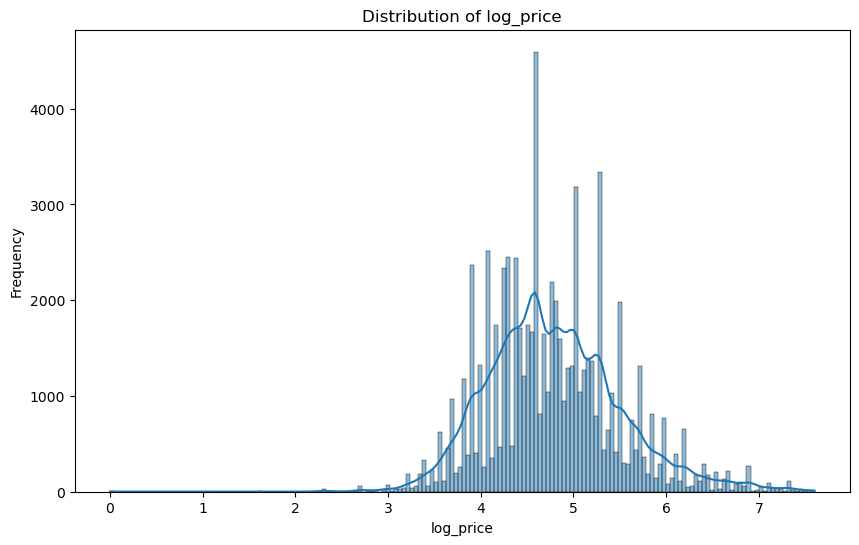

In [39]:
# Distribution of log_price
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))
sns.histplot(data['log_price'], kde=True)
plt.title('Distribution of log_price')
plt.xlabel('log_price')
plt.ylabel('Frequency')
plt.show()

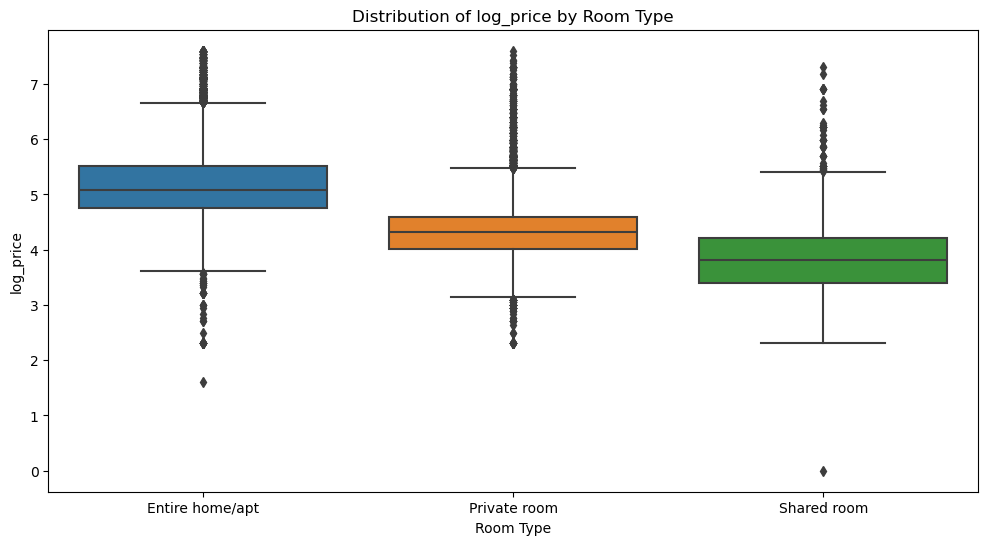

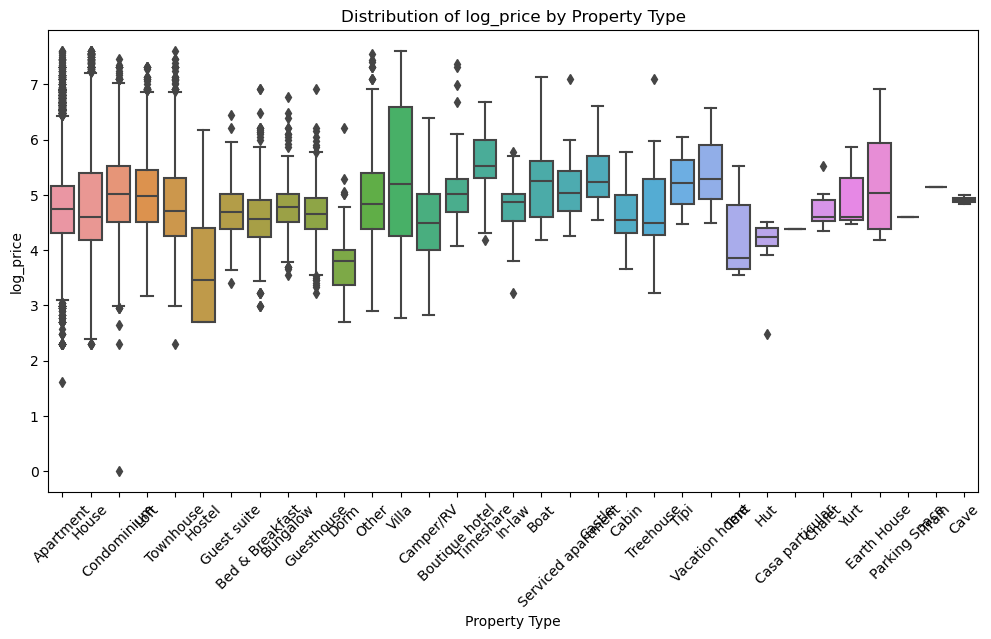

In [40]:
# Box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='log_price', data=data)
plt.title('Distribution of log_price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('log_price')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='property_type', y='log_price', data=data)
plt.title('Distribution of log_price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('log_price')
plt.xticks(rotation=45)
plt.show()

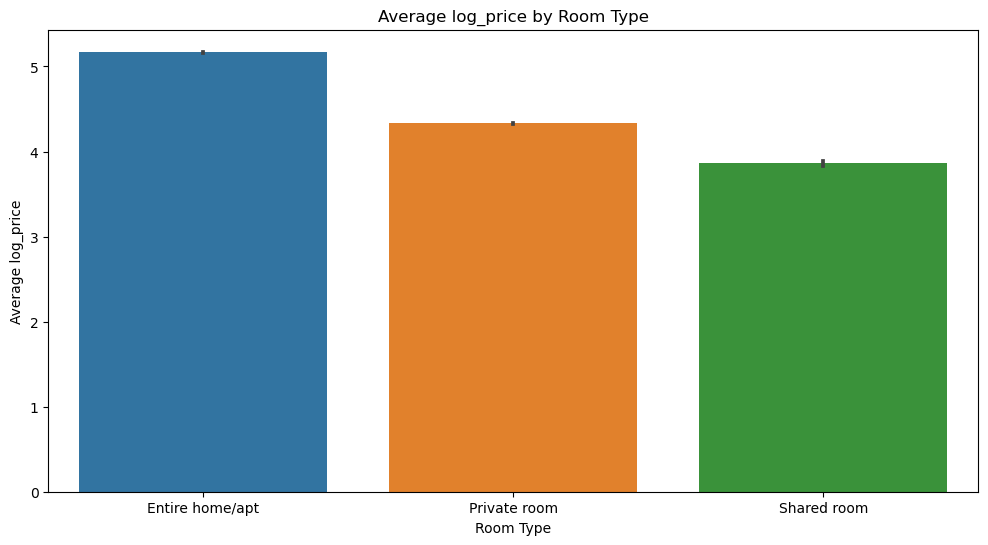

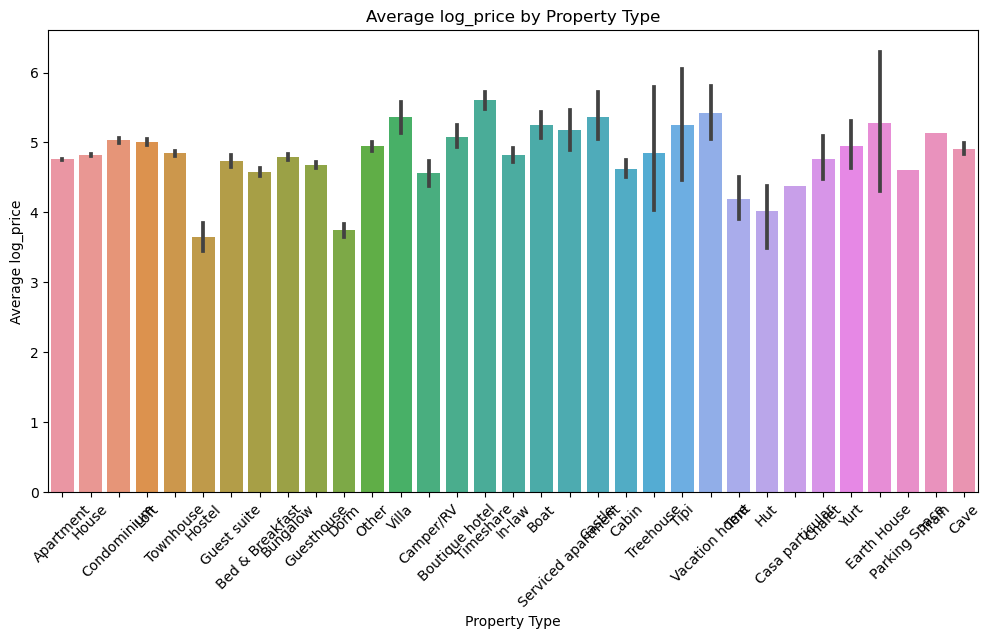

In [41]:
# Bar plots
plt.figure(figsize=(12, 6))
sns.barplot(x='room_type', y='log_price', data=data, estimator=np.mean)
plt.title('Average log_price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average log_price')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='property_type', y='log_price', data=data, estimator=np.mean)
plt.title('Average log_price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average log_price')
plt.xticks(rotation=45)
plt.show()

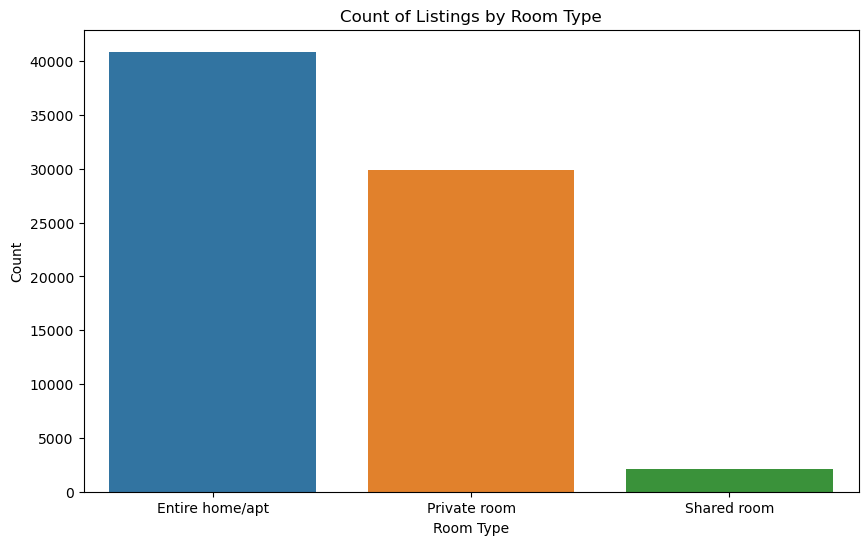

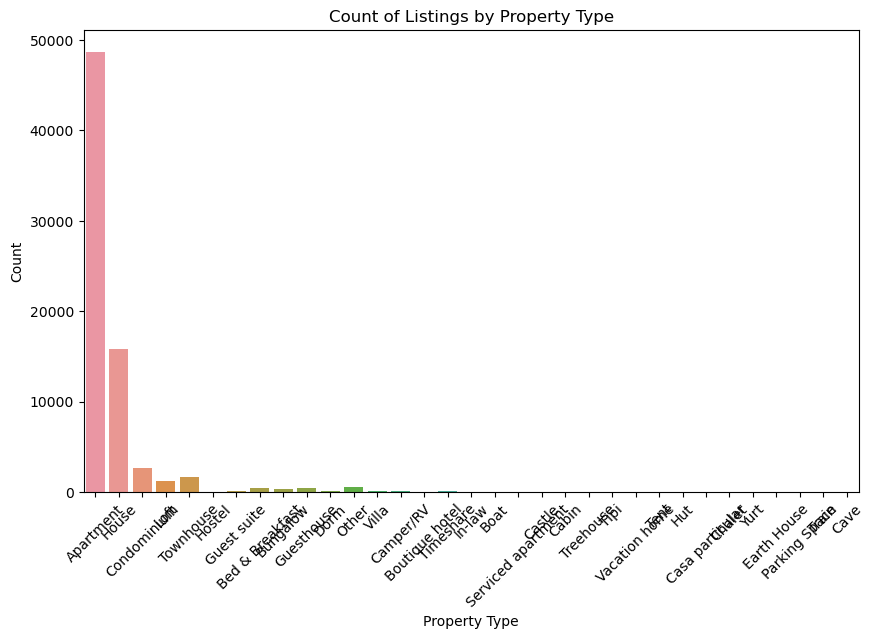

In [42]:
# Count plots
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=data)
plt.title('Count of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='property_type', data=data)
plt.title('Count of Listings by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Analyzing how pricing (log_price) correlates with both categorical`accommodates` and `number_of_reviews`**

In [43]:
data[["log_price","accommodates","number_of_reviews"]]

,log_price,accommodates,number_of_reviews
0,5.010635,3,2
1,5.129899,7,6
2,4.976734,5,10
3,6.620073,4,0
4,4.744932,2,4
...,...,...,...
74106,4.605170,1,0
74107,5.043425,4,16
74108,5.220356,5,43
74109,5.273000,2,0


In [44]:
print(data["accommodates"].unique())
print(data['accommodates'].value_counts())

[ 3  7  5  4  2  6  8  1  9 10 16 11 12 14 13 15]
accommodates
2     31286
4     11901
1      9281
3      7663
6      4913
5      3389
8      1762
7       930
10      677
16      291
9       266
12      254
14       99
11       79
15       53
13       36
Name: count, dtype: int64


In [45]:
print(len(data["number_of_reviews"].unique()))
print(data['number_of_reviews'].value_counts())

371
number_of_reviews
0      15463
1       6978
2       4648
3       3593
4       2861
       ...  
532        1
370        1
449        1
314        1
341        1
Name: count, Length: 371, dtype: int64


In [46]:
count_reviews_equal_0 = data[data['number_of_reviews'] == 0]['log_price']
count_reviews_between_0_and_5 = data[(data['number_of_reviews'] > 0) & (data['number_of_reviews'] <= 5)]['log_price']
count_reviews_between_5_and_10 = data[(data['number_of_reviews'] > 5) & (data['number_of_reviews'] <= 10)]['log_price']
count_reviews_greater_than_10 = data[data['number_of_reviews'] > 10]['log_price']
# Convert to lists to ensure they are sequences

In [47]:
print(len(count_reviews_equal_0))
print(len(count_reviews_between_0_and_5))
print(len(count_reviews_between_5_and_10))
print(len(count_reviews_greater_than_10))

15463
20553
8184
28680


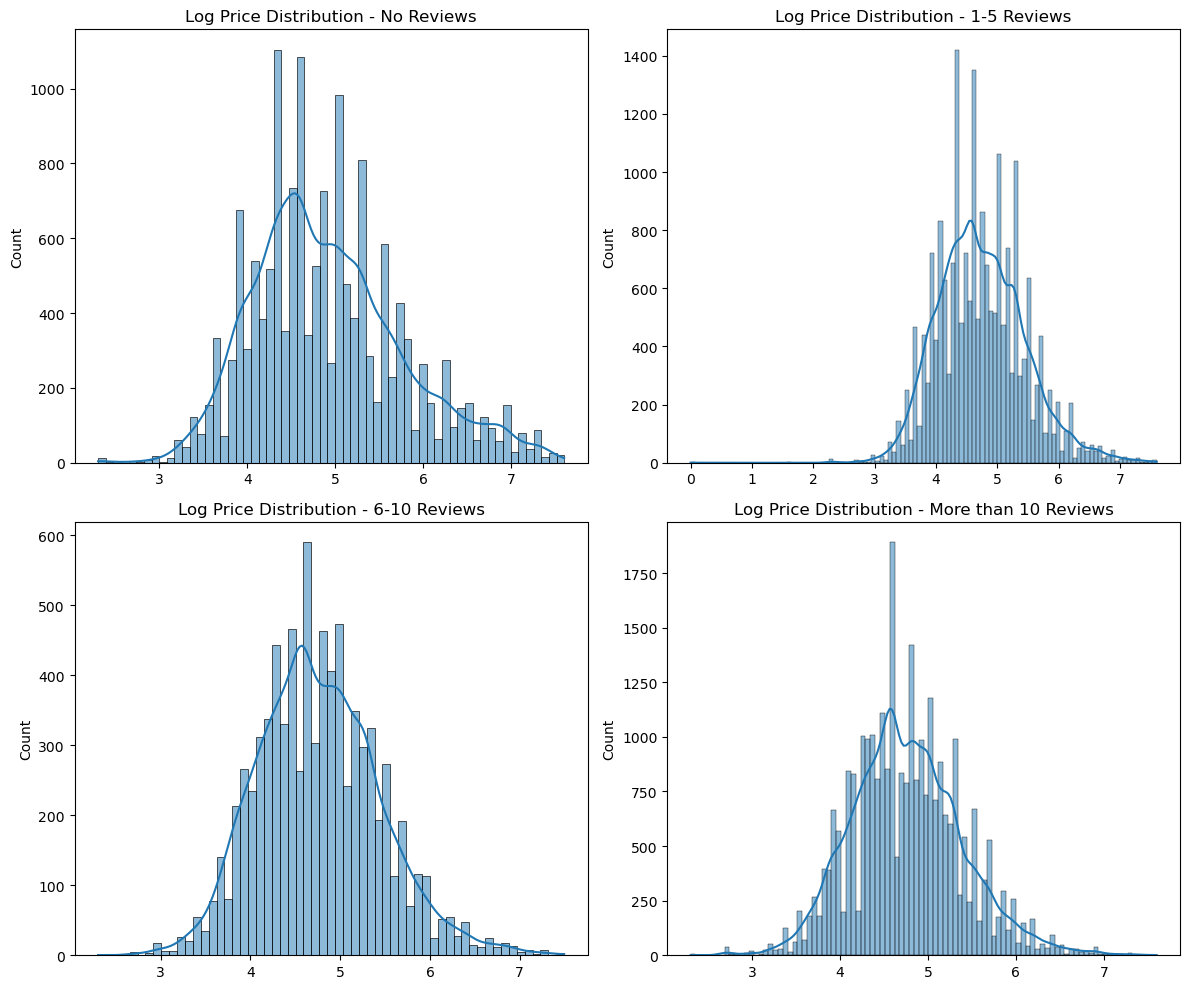

In [48]:
count_reviews_equal_0 = count_reviews_equal_0.tolist()
count_reviews_between_0_and_5 = count_reviews_between_0_and_5.tolist()
count_reviews_between_5_and_10 = count_reviews_between_5_and_10.tolist()
count_reviews_greater_than_10 = count_reviews_greater_than_10.tolist()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot for count_reviews_equal_0
sns.histplot(count_reviews_equal_0, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Log Price Distribution - No Reviews')

# Plot for count_reviews_between_0_and_5
sns.histplot(count_reviews_between_0_and_5, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Log Price Distribution - 1-5 Reviews')

# Plot for count_reviews_between_5_and_10
sns.histplot(count_reviews_between_5_and_10, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Log Price Distribution - 6-10 Reviews')

# Plot for count_reviews_greater_than_10
sns.histplot(count_reviews_greater_than_10, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Log Price Distribution - More than 10 Reviews')

# Adjust layout
plt.tight_layout()
plt.show()

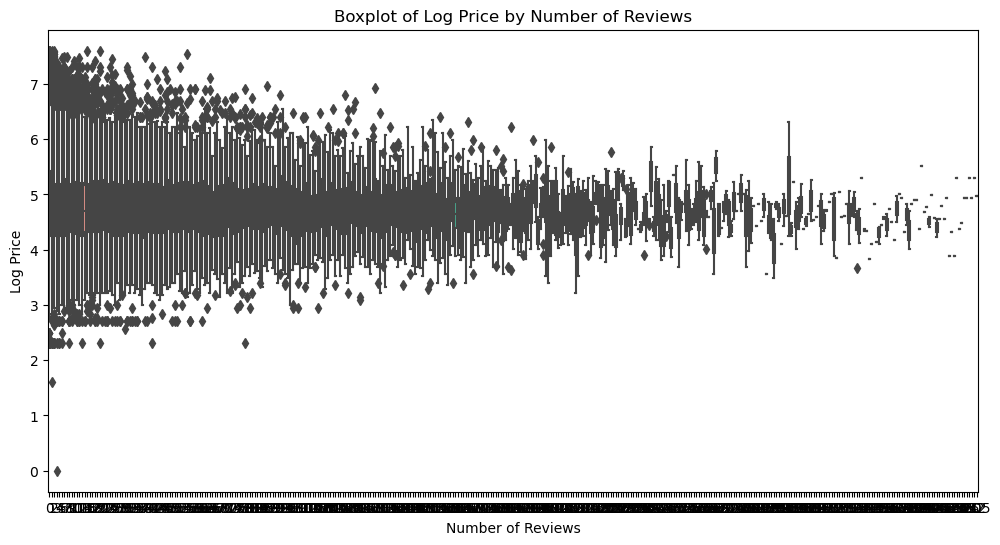

Correlation coefficient between Number of Reviews and Log Price: -0.035190237851694006


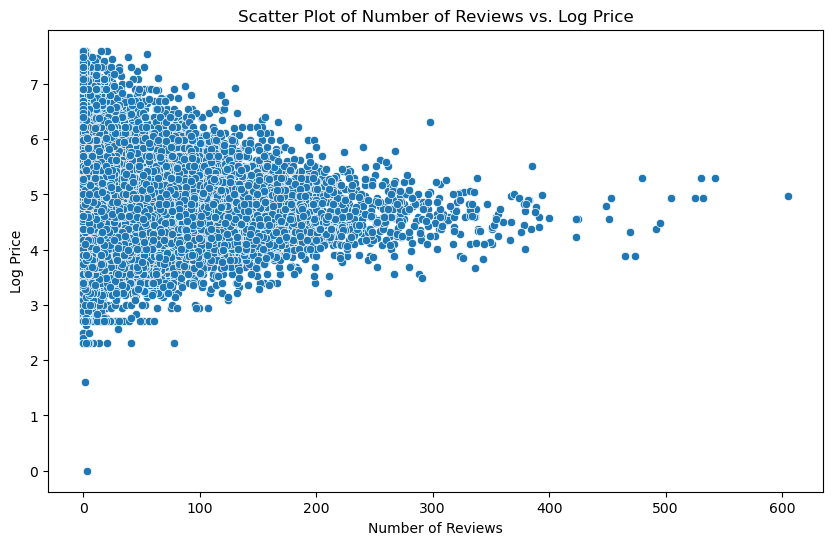

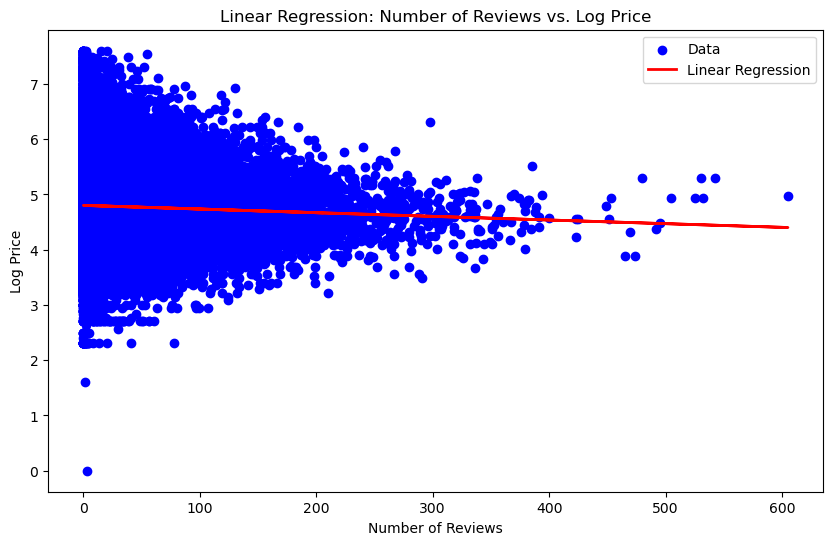

Intercept: 4.801851130428697
Coefficient: -0.0006622998789093254


In [49]:
# Assuming data is your DataFrame containing the relevant columns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
# Boxplot Comparison
plt.figure(figsize=(12, 6))
sns.boxplot(x='number_of_reviews', y='log_price', data=data)
plt.title('Boxplot of Log Price by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Log Price')
plt.show()

# Correlation Analysis
correlation, _ = pearsonr(data['number_of_reviews'], data['log_price'])
print("Correlation coefficient between Number of Reviews and Log Price:", correlation)

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='log_price', data=data)
plt.title('Scatter Plot of Number of Reviews vs. Log Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Log Price')
plt.show()

# Regression Analysis
X = data['number_of_reviews'].values.reshape(-1, 1)
y = data['log_price'].values

model = LinearRegression()
model.fit(X, y)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Linear Regression')
plt.title('Linear Regression: Number of Reviews vs. Log Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Log Price')
plt.legend()
plt.show()

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])


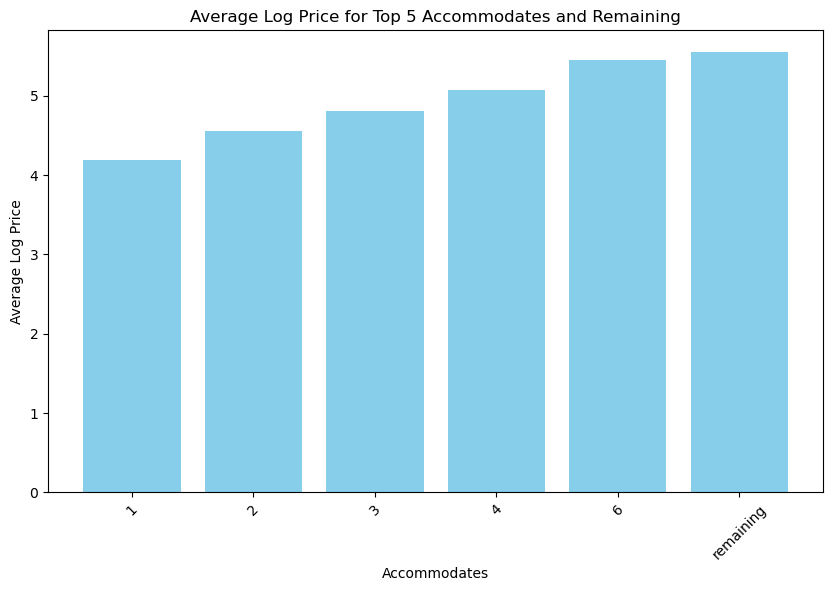

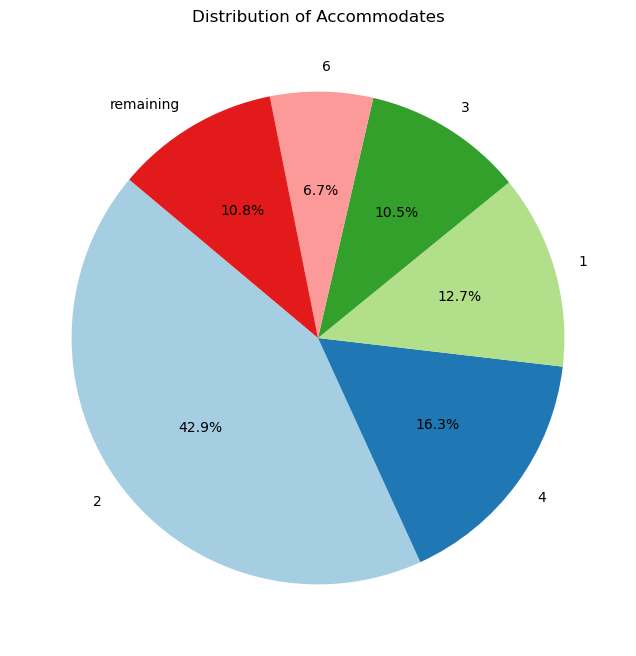

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'log_price' is already a column in it.

# Identify the top 5 'accommodates' values.
top5_accommodates = data['accommodates'].value_counts().head(5).index.tolist()

# Filter the data for only the top 5 'accommodates' and the 'remaining'.
top5_data = data[data['accommodates'].isin(top5_accommodates)]
remaining_data = data[~data['accommodates'].isin(top5_accommodates)]

# Calculate the average 'log_price' for the top 5.
top5_average_prices = top5_data.groupby('accommodates')['log_price'].mean().reset_index()

# Calculate the average 'log_price' for the 'remaining'.
remaining_average_price = pd.DataFrame([{'accommodates': 'remaining', 'log_price': remaining_data['log_price'].mean()}])

# Combine the average prices for the top 5 and 'remaining' using 'concat'.
average_prices = pd.concat([top5_average_prices, remaining_average_price], ignore_index=True)

# Visualize the average 'log_price' for the top 5 and 'remaining' with a bar chart.
plt.figure(figsize=(10, 6))
plt.bar(average_prices['accommodates'].astype(str), average_prices['log_price'], color='skyblue')
plt.xlabel('Accommodates')
plt.ylabel('Average Log Price')
plt.title('Average Log Price for Top 5 Accommodates and Remaining')
plt.xticks(rotation=45)
plt.show()

# ... previous code ...

# Now, let's create a pie chart to show the distribution of 'accommodates'.
accommodates_counts = data['accommodates'].value_counts()
top5_counts = accommodates_counts.head(5)
remaining_count = accommodates_counts[5:].sum()
pie_data = pd.concat([top5_counts, pd.Series({'remaining': remaining_count})])

plt.figure(figsize=(8, 8))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(pie_data))))
plt.title('Distribution of Accommodates')
plt.show()




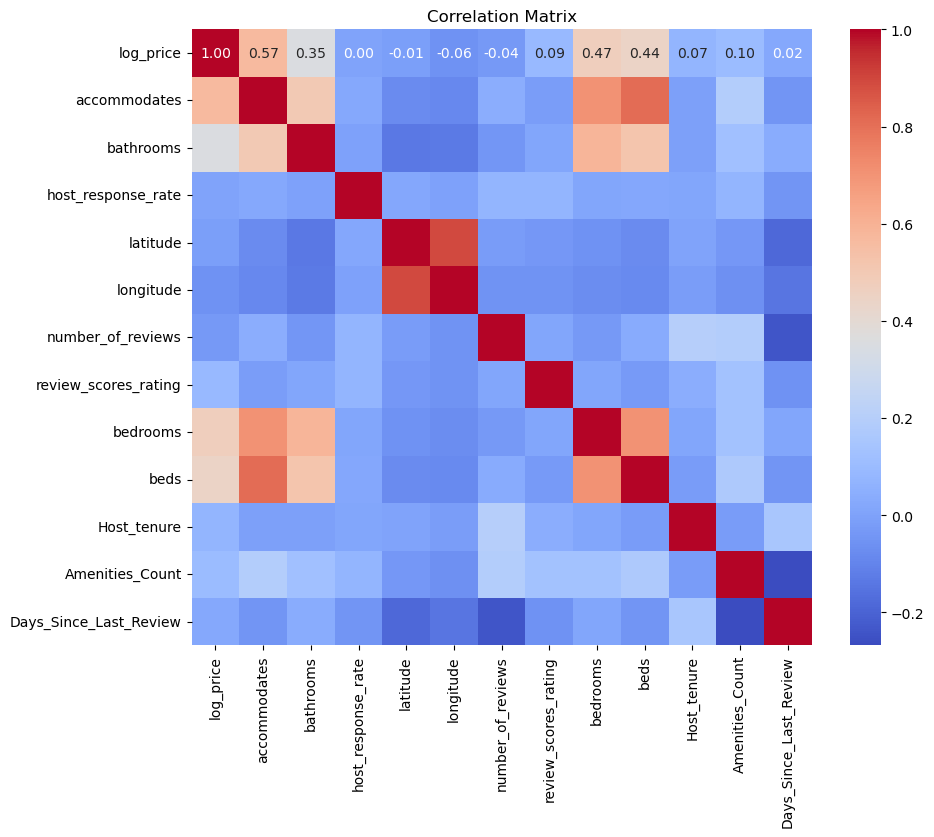

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_data = data.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numerical_data.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Observations**

1) The avg log price for the "Home/apt" have more than compare to "private_room", "shared_room"

2) The distribution of log price is more between 4 to 5
3) The count of number of reviews which are greater than 10 are maximum and count between 5 to 10 are minimm.
4) Nearly about 43 percent of accodimates ar 2.
5) log price have a good correlation score with "accommodates" and "bedrooms"

**3. Geospatial Analysis**

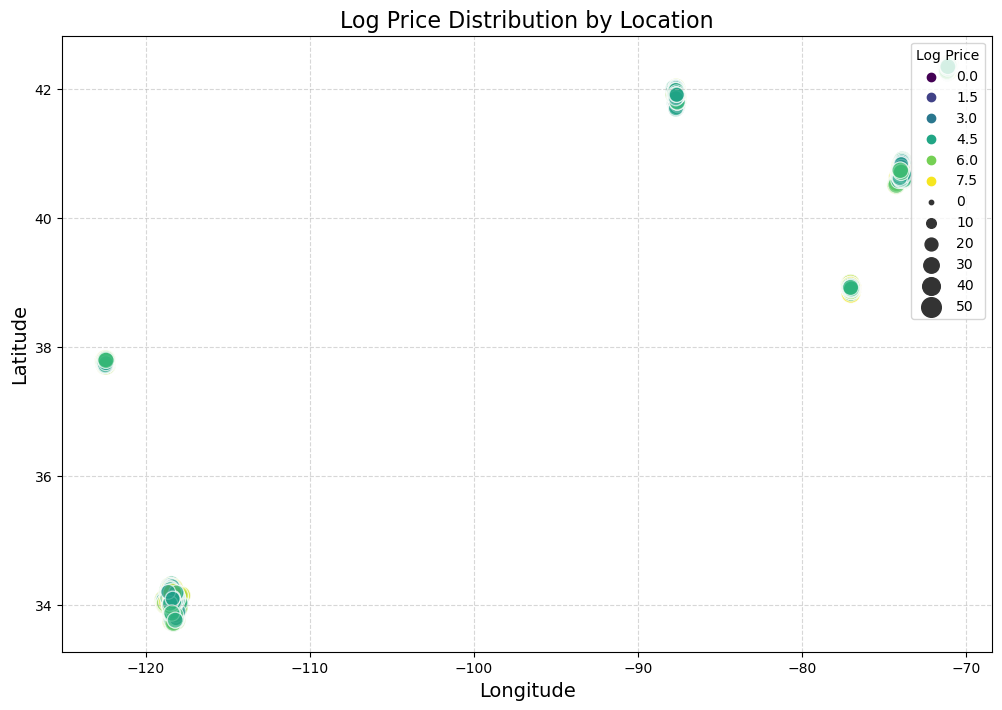

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data is your DataFrame containing the relevant columns (longitude, latitude, zipcode, log_price)

# Plotting
plt.figure(figsize=(12, 8))

# Adjust marker size based on log_price
marker_size = 50 * (data['log_price'] - data['log_price'].min()) / (data['log_price'].max() - data['log_price'].min())

sns.scatterplot(x='longitude', y='latitude', hue='log_price', size=marker_size, sizes=(10, 200), data=data, palette='viridis', alpha=0.7)

# Enhancements
plt.title('Log Price Distribution by Location', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.legend(title='Log Price', loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


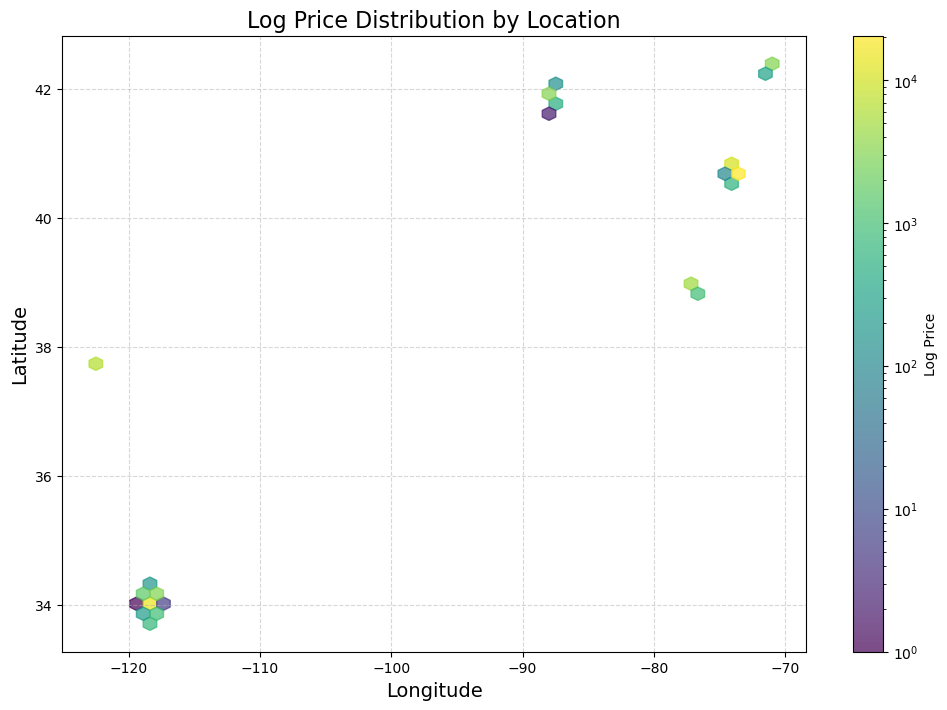

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data is your DataFrame containing the relevant columns (longitude, latitude, zipcode, log_price)

# Plotting
plt.figure(figsize=(12, 8))

plt.hexbin(data['longitude'], data['latitude'], gridsize=50, cmap='viridis', bins='log', alpha=0.7)

# Enhancements
plt.title('Log Price Distribution by Location', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.colorbar(label='Log Price')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


In [54]:
# Group the data by zipcode
grouped_data = data.groupby('zipcode')

# Calculate statistics for log_price within each zipcode group
price_stats_by_zipcode = grouped_data['log_price'].agg(['mean', 'min', 'max', 'count'])

# Find the top 10 zipcodes with the highest log_price
top_10_zipcodes = price_stats_by_zipcode.nlargest(10, 'mean')

# Extract longitude, latitude, and neighborhood information for the top 10 zipcodes
top_zipcode_info = data[data['zipcode'].isin(top_10_zipcodes.index)][['zipcode', 'longitude', 'latitude', 'neighbourhood']]

# Aggregate longitude, latitude, and neighborhood values for each unique zipcode
unique_zipcode_info = top_zipcode_info.groupby('zipcode').agg({'longitude': 'first', 'latitude': 'first', 'neighbourhood': 'first'}).reset_index()

# Print the results
print("Top 10 Zipcodes with Highest Log Price:")
print(top_10_zipcodes)

# Print the longitude, latitude, and neighborhood information
print("\nLongitude, Latitude, and Neighborhood for Top 10 Zipcodes:")
print(unique_zipcode_info)


Top 10 Zipcodes with Highest Log Price:
             mean       min       max  count
zipcode                                     
10119    7.313220  7.313220  7.313220      1
20815    7.130899  7.130899  7.130899      1
20064    7.090077  7.090077  7.090077      2
2186     6.802395  6.802395  6.802395      1
94129    6.728703  6.549651  6.907755      2
20781    6.620073  6.620073  6.620073      1
15074    6.381816  6.381816  6.381816      1
94104    6.203121  5.164786  7.313220     15
10279    6.173786  6.173786  6.173786      1
20268    6.149420  5.517453  6.856462      5

Longitude, Latitude, and Neighborhood for Top 10 Zipcodes:
   zipcode   longitude   latitude             neighbourhood
0     2186  -71.075567  42.270470                Dorchester
1    10119  -73.991594  40.749363                   Chelsea
2    10279  -74.013595  40.710808        Financial District
3    15074 -122.420165  37.775561              Civic Center
4    20064  -76.996143  38.932425                  Edgewood


In [55]:
import folium

# Choose the latitude and longitude of the first zip code to center the map
center_latitude = unique_zipcode_info.iloc[0]['latitude']
center_longitude = unique_zipcode_info.iloc[0]['longitude']

# Create a map centered around the chosen latitude and longitude
m = folium.Map(location=[center_latitude, center_longitude], zoom_start=10)

# Plot each longitude and latitude point on the map with a popup showing the neighborhood
for index, row in unique_zipcode_info.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['neighbourhood']
    ).add_to(m)

# Display the map in the notebook
m


In [56]:
# Find the bottom 10 zipcodes with the lowest log_price
bottom_10_zipcodes = price_stats_by_zipcode.nsmallest(10, 'mean')

# Extract longitude, latitude, and neighborhood information for the bottom 10 zipcodes
bottom_zipcode_info = data[data['zipcode'].isin(bottom_10_zipcodes.index)][['zipcode', 'longitude', 'latitude', 'neighbourhood']]

# Aggregate longitude, latitude, and neighborhood values for each unique zipcode
unique_bottom_zipcode_info = bottom_zipcode_info.groupby('zipcode').agg({'longitude': 'first', 'latitude': 'first', 'neighbourhood': 'first'}).reset_index()

# Print the results
print("Bottom 10 Zipcodes with Lowest Log Price:")
print(bottom_10_zipcodes)

# Print the longitude, latitude, and neighborhood information for the bottom 10 zipcodes
print("\nLongitude, Latitude, and Neighborhood for Bottom 10 Zipcodes:")
print(unique_bottom_zipcode_info)


Bottom 10 Zipcodes with Lowest Log Price:
                mean       min       max  count
zipcode                                        
60617       3.184555  2.995732  3.912023      7
60621       3.563965  2.302585  5.129899     15
91606-1412  3.610918  3.610918  3.610918      1
92880       3.663562  3.663562  3.663562      1
90255       3.701652  2.944439  4.248495      3
60652       3.742374  3.496508  4.234107      3
90247       3.776943  2.890372  5.293305     44
60629       3.778578  3.367296  4.382027      9
60660-1448  3.784190  3.784190  3.784190      1
90701       3.800451  3.688879  3.912023      2

Longitude, Latitude, and Neighborhood for Bottom 10 Zipcodes:
      zipcode   longitude   latitude    neighbourhood
0       60617  -87.565470  41.739165    South Chicago
1       60621  -87.653275  41.789302        Englewood
2       60629  -87.733045  41.777956        West Lawn
3       60652  -87.729661  41.753681        West Lawn
4       90247 -118.302294  33.901342          Gar

In [57]:
import folium

# Choose the latitude and longitude of the first zip code to center the map
center_latitude = unique_bottom_zipcode_info.iloc[0]['latitude']
center_longitude = unique_bottom_zipcode_info.iloc[0]['longitude']

# Create a map centered around the chosen latitude and longitude
m_bottom = folium.Map(location=[center_latitude, center_longitude], zoom_start=10)

# Plot each longitude and latitude point on the map with a popup showing the neighborhood
for index, row in unique_bottom_zipcode_info.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['neighbourhood']
    ).add_to(m_bottom)

# Display the map in the notebook
m_bottom


**Observations**

1) The highest price of house is at zipcode-10119  , longitude-73.991594 ,latitude-40.749363 and neighbourhood-Chelsea

2) Around this location {94104 ,-122.402111,37.788989,Financial District} there are 15 houses present in the top 10 price category

3) The lowest price of a house is at zipcode-60617 , longitude-87.565470 ,latitude-41.739165 and neighbourhood-South Chicago
4) Around this location(90247,-118.302294,33.901342,Gardena) there are 44 houses present in the lowest 10 price category.
ry.

**4)Sentiment Analysis on Textual Data**

In [58]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores for descriptions
def get_sentiment_score(text):
    # Calculate sentiment scores
    scores = sid.polarity_scores(text)
    # Return compound sentiment score (a single value between -1 and 1)
    return scores['compound']

# Apply sentiment analysis to the 'description' column and create a new column for sentiment scores
data['description_sentiment'] = data['description'].apply(get_sentiment_score)

# Now you can use the 'description_sentiment' column as a feature in your predictive model


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jaide\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [59]:
data.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,Host_tenure,Amenities_Count,Days_Since_Last_Review,description_sentiment
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",t,t,1.0,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0,12,152,2851,0.8658
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,t,f,1.0,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0,7,218,2419,0.9755
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,t,t,1.0,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0,8,311,2428,0.9420
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,t,t,1.0,2015-04-19,f,NaT,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,94117,2.0,2.0,9,210,<NA>,0.8513
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",t,t,1.0,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0,9,174,2663,0.9401


In [60]:
# Calculate the average description_sentiment score
avg_sentiment_score = data['description_sentiment'].mean()


# Count the number of scores above 0.8
above_0_8_count = data[data['description_sentiment'] > 0.8].shape[0]

# Count the number of scores between 0.5 and 0.8
between_0_5_and_0_8_count = data[(data['description_sentiment'] >= 0.5) & (data['description_sentiment'] <= 0.8)].shape[0]

# Count the number of scores between 0.2 and 0.5
between_0_2_and_0_5_count = data[(data['description_sentiment'] >= 0.2) & (data['description_sentiment'] < 0.5)].shape[0]

# Count the number of scores less than 0.2
less_than_0_2_count = data[data['description_sentiment'] < 0.2].shape[0]

# Print the results
print("Average description_sentiment score:", avg_sentiment_score)
print("Number of scores above 0.8:", above_0_8_count)
print("Number of scores between 0.5 and 0.8:", between_0_5_and_0_8_count)
print("Number of scores between 0.2 and 0.5:", between_0_2_and_0_5_count)
print("Number of scores less than 0.2:", less_than_0_2_count)


Average description_sentiment score: 0.8327878306805707
Number of scores above 0.8: 57645
Number of scores between 0.5 and 0.8: 8124
Number of scores between 0.2 and 0.5: 2972
Number of scores less than 0.2: 4139


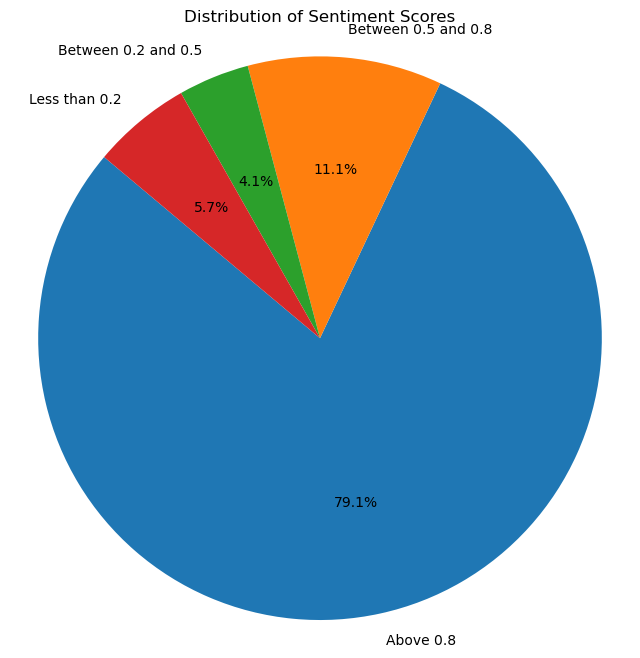

In [61]:
import matplotlib.pyplot as plt

# Total number of samples
total_samples = len(data)

# Define the counts for each sentiment range
counts = [above_0_8_count, between_0_5_and_0_8_count, between_0_2_and_0_5_count, less_than_0_2_count]
labels = ['Above 0.8', 'Between 0.5 and 0.8', 'Between 0.2 and 0.5', 'Less than 0.2']

# Calculate the percentages relative to the total number of samples
percentages = [(count / total_samples) * 100 for count in counts]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiment Scores')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


**Observation**

1) Nearly about 80 percent of the descriptive data is positive which means that majority of the people in data have no issues regarding the houses
2) Nearly about 7000 houses have bad and worst feedback which is about 10 percent in whole data given
3) Because of getting the sentimental score of description, there's no need of `description` column while model training

**5. Amenities Analysis**

In [62]:
data["amenities"]

0        {"Wireless Internet","Air conditioning",Kitche...
1        {"Wireless Internet","Air conditioning",Kitche...
2        {TV,"Cable TV","Wireless Internet","Air condit...
3        {TV,"Cable TV",Internet,"Wireless Internet",Ki...
4        {TV,Internet,"Wireless Internet","Air conditio...
                               ...                        
74106                                                   {}
74107    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
74108    {TV,Internet,"Wireless Internet","Air conditio...
74109    {TV,"Wireless Internet","Air conditioning",Kit...
74110    {TV,Internet,"Wireless Internet",Kitchen,"Free...
Name: amenities, Length: 72880, dtype: object

In [63]:
data["amenities"].unique()

array(['{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Essentials,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}',
       '{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}',
       '{TV,"Cable TV","Wireless Internet","Air conditioning",Kitchen,Breakfast,"Buzzer/wireless intercom",Heating,"Family/kid friendly","Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_50"}',
       ...,
       '{TV,"Cable TV",Internet,"Wireless Internet",Kitchen,"Free parking on premises",Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector",Essentials,Shampoo,Hangers,"Hair dryer","translation missing: en.hosting_amenity_50"}',
       '{TV,Internet,"Wireless Internet

In [67]:
from scipy.stats import pearsonr
import numpy as np
from collections import Counter

# Convert 'amenities' column to list of amenities
amenities_list = data['amenities'].apply(lambda x: x.strip('{}').split(','))

# Calculate the correlation between each amenity and the listing price
amenity_correlations = {}
for amenity in set([item.strip('"') for sublist in amenities_list for item in sublist]):
    amenity_values = []
    # Check if the amenity exists in each listing
    for amenities in amenities_list:
        if amenity in amenities:
            amenity_values.append(1)
        else:
            amenity_values.append(0)
    # Calculate correlation only if there is variability in the data
    if np.std(amenity_values) != 0:
        correlation, _ = pearsonr(amenity_values, data['log_price'])
        amenity_correlations[amenity] = correlation

# Sort the amenities by correlation coefficient
sorted_correlations = sorted(amenity_correlations.items(), key=lambda x: abs(x[1]), reverse=True)

# Initialize a Counter to count the frequency of each amenity
amenity_counter = Counter()

# Iterate over all amenities and count their occurrences
for amenities in amenities_list:
    for amenity in amenities:
        amenity_counter[amenity.strip('"')] += 1

# Get the top 10 most common amenities
top_10_amenities = amenity_counter.most_common(10)

# Print the top correlated amenities
print("Top Correlated Amenities with Listing Price:")
for amenity, correlation in sorted_correlations[:10]:
    print(f"{amenity}: {correlation}")

# Print the top 10 most common amenities
print("\nTop 10 Amenities by Frequency:")
for amenity, count in top_10_amenities:
    print(f"{amenity}: {count}")


Top Correlated Amenities with Listing Price:
TV: 0.2638379591598794
Dryer: 0.17526361087739503
Washer: 0.1695785591531423
Doorman: 0.12010229414366391
Gym: 0.1129930442733267
Iron: 0.10936662737062988
Heating: 0.10184781038660204
Elevator: 0.09829828891018849
Kitchen: 0.09809744047557739
Shampoo: 0.09660603725838346

Top 10 Amenities by Frequency:
Wireless Internet: 70159
Kitchen: 66519
Heating: 66064
Essentials: 63049
Smoke detector: 60783
Air conditioning: 54212
TV: 51656
Shampoo: 48630
Hangers: 48377
Carbon monoxide detector: 46477


**Observation**

1) There are many different number of amenities present.
2) "Wifi" is almost the most amenity that is present in every household in the data.
3) "TV" is the highly correlated amenity with the `log_price` 

**6. Categorical Data Encoding:**

In [68]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming 'data' is your dataset loaded into a pandas DataFrame

# Select the categorical columns you want to encode
categorical_cols = ['room_type', 'city', 'property_type']

# Perform one-hot encoding
encoder = OneHotEncoder(sparse=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(data[categorical_cols]))
encoded_cols.columns = encoder.get_feature_names_out(categorical_cols)

# Replace original categorical columns with the encoded ones
data_encoded = pd.concat([data.drop(columns=categorical_cols), encoded_cols], axis=1)

# Now data_encoded contains your original data with one-hot encoded categorical variables


In [69]:
print("Room_Type unique classes: ",data["room_type"].unique())
print("City unique classes: ",data["city"].unique())
print("Property_Type unique classes: ",data["property_type"].unique())

Room_Type unique classes:  ['Entire home/apt' 'Private room' 'Shared room']
City unique classes:  ['NYC' 'SF' 'DC' 'LA' 'Chicago' 'Boston']
Property_Type unique classes:  ['Apartment' 'House' 'Condominium' 'Loft' 'Townhouse' 'Hostel'
 'Guest suite' 'Bed & Breakfast' 'Bungalow' 'Guesthouse' 'Dorm' 'Other'
 'Villa' 'Camper/RV' 'Boutique hotel' 'Timeshare' 'In-law' 'Boat'
 'Serviced apartment' 'Castle' 'Cabin' 'Treehouse' 'Tipi' 'Vacation home'
 'Tent' 'Hut' 'Casa particular' 'Chalet' 'Yurt' 'Earth House'
 'Parking Space' 'Train' 'Cave']


In [70]:
data["room_type"].value_counts()

room_type
Entire home/apt    40868
Private room       29893
Shared room         2119
Name: count, dtype: int64

In [71]:
data["city"].value_counts()

city
NYC        32165
LA         21440
SF          6423
DC          5680
Chicago     3709
Boston      3463
Name: count, dtype: int64

In [72]:
data["property_type"].value_counts()

property_type
Apartment             48653
House                 15874
Condominium            2621
Townhouse              1634
Loft                   1239
Other                   591
Guesthouse              481
Bed & Breakfast         443
Bungalow                362
Dorm                    141
Villa                   135
Guest suite             121
Timeshare                76
Camper/RV                76
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     61
Cabin                    60
Serviced apartment       20
Tent                     18
Castle                   12
Vacation home            11
Yurt                      9
Treehouse                 7
Hut                       7
Chalet                    6
Earth House               4
Tipi                      3
Cave                      2
Casa particular           1
Parking Space             1
Train                     1
Name: count, dtype: int64

In [73]:

# Assuming 'data' is your dataset loaded into a pandas DataFrame

# Get the value counts of property types
property_type_counts = data['property_type'].value_counts()

# Sort the property types based on counts
sorted_property_types = property_type_counts.sort_values(ascending=False)
# Select the top 5 property types
top_5_property_types = sorted_property_types.head(5)

# Get the sum of counts of the top 5 property types
sum_top_5_counts = top_5_property_types.sum()

print("Sum of counts of top 5 property types:", sum_top_5_counts)

Sum of counts of top 5 property types: 70021


In [74]:
print("Percentage of Top-5 values counts in the `property_type` is: ",(sum_top_5_counts/len(data))*100)

Percentage of Top-5 values counts in the `property_type` is:  96.07711306256861


In [75]:

import pandas as pd

# Assuming 'data' is your dataset loaded into a pandas DataFrame

# Select the columns to one-hot encode
columns_to_encode = ['room_type', 'city']

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(data[columns_to_encode])

# Convert boolean values to integers (1s and 0s)
one_hot_encoded = one_hot_encoded.astype(int)

# Concatenate the one-hot encoded columns with the original dataset
data = pd.concat([data.drop(columns=columns_to_encode), one_hot_encoded], axis=1)

# Now data_encoded contains your original data with one-hot encoded columns for 'room_type' and 'city', encoded as 1s and 0s



In [76]:
data

,log_price,property_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,description,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,Host_tenure,Amenities_Count,Days_Since_Last_Review,description_sentiment,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
0,5.010635,Apartment,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,"Beautiful, sunlit brownstone 1-bedroom in the ...",t,t,1.0,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0,12,152,2851,0.8658,1,0,0,0,0,0,0,1,0
1,5.129899,Apartment,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,Enjoy travelling during your stay in Manhattan...,t,f,1.0,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0,7,218,2419,0.9755,1,0,0,0,0,0,0,1,0
2,4.976734,Apartment,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,The Oasis comes complete with a full backyard ...,t,t,1.0,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0,8,311,2428,0.9420,1,0,0,0,0,0,0,1,0
3,6.620073,House,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,This light-filled home-away-from-home is super...,t,t,1.0,2015-04-19,f,NaT,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,94117,2.0,2.0,9,210,<NA>,0.8513,1,0,0,0,0,0,0,0,1
4,4.744932,Apartment,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,"Cool, cozy, and comfortable studio located in ...",t,t,1.0,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0,9,174,2663,0.9401,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,Apartment,{},1,1.0,Real Bed,flexible,False,one room in bushwick apt,t,t,1.0,2013-03-24,f,NaT,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,11206,1.0,1.0,11,2,<NA>,0.0000,0,1,0,0,0,0,0,1,0
74107,5.043425,Apartment,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,"Located on the Pacific Coast Highway, this apa...",t,f,1.0,2016-05-03,f,2017-04-15,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,90254,2.0,4.0,8,224,2580,0.7845,1,0,0,0,0,0,1,0,0
74108,5.220356,Apartment,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,A modern apartment located in East Williamsbur...,t,t,1.0,2012-01-05,t,2017-09-10,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,11206,2.0,2.0,12,402,2432,0.6698,1,0,0,0,0,0,0,1,0
74109,5.273000,Apartment,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,"Fully renovated, designer's studio located in ...",t,f,1.0,2017-09-17,t,NaT,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,10011,0.0,2.0,7,189,<NA>,0.8292,1,0,0,0,0,0,0,1,0


In [77]:
import pandas as pd

# Assuming 'data' is your dataset loaded into a pandas DataFrame

# Top 5 property types
top_5_property_types = ['Apartment', 'House', 'Condominium', 'Townhouse', 'Loft']

# Replace all other property types with 'Others'
data['property_type'] = data['property_type'].apply(lambda x: x if x in top_5_property_types else 'Others')

# Perform one-hot encoding for 'property_type'
one_hot_property_type = pd.get_dummies(data['property_type']).astype(int)

# Concatenate one-hot encoded column with the original dataset
data = pd.concat([data.drop(columns=['property_type']), one_hot_property_type], axis=1)

# Now data_encoded contains your original data with one-hot encoded column for 'property_type', with values of 1s and 0s


In [78]:
data

,log_price,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,description,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,Host_tenure,Amenities_Count,Days_Since_Last_Review,description_sentiment,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,Apartment,Condominium,House,Loft,Others,Townhouse
0,5.010635,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,"Beautiful, sunlit brownstone 1-bedroom in the ...",t,t,1.0,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0,12,152,2851,0.8658,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,5.129899,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,Enjoy travelling during your stay in Manhattan...,t,f,1.0,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0,7,218,2419,0.9755,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,4.976734,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,The Oasis comes complete with a full backyard ...,t,t,1.0,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0,8,311,2428,0.9420,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,6.620073,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,This light-filled home-away-from-home is super...,t,t,1.0,2015-04-19,f,NaT,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,94117,2.0,2.0,9,210,<NA>,0.8513,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,4.744932,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,"Cool, cozy, and comfortable studio located in ...",t,t,1.0,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0,9,174,2663,0.9401,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,{},1,1.0,Real Bed,flexible,False,one room in bushwick apt,t,t,1.0,2013-03-24,f,NaT,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,11206,1.0,1.0,11,2,<NA>,0.0000,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
74107,5.043425,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,"Located on the Pacific Coast Highway, this apa...",t,f,1.0,2016-05-03,f,2017-04-15,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,90254,2.0,4.0,8,224,2580,0.7845,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
74108,5.220356,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,A modern apartment located in East Williamsbur...,t,t,1.0,2012-01-05,t,2017-09-10,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,11206,2.0,2.0,12,402,2432,0.6698,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
74109,5.273000,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,"Fully renovated, designer's studio located in ...",t,f,1.0,2017-09-17,t,NaT,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,10011,0.0,2.0,7,189,<NA>,0.8292,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [79]:
data["bed_type"].value_counts()

bed_type
Real Bed         70822
Futon              745
Pull-out Sofa      579
Airbed             472
Couch              262
Name: count, dtype: int64

In [80]:
# Assuming 'data' is your dataset loaded into a pandas DataFrame

# Replace values based on condition
data['bed_type'] = data['bed_type'].replace('Real Bed', 1).replace(['Futon', 'Pull-out Sofa', 'Airbed', 'Couch'], 0)

# Now 'Real Bed' is replaced with 1, and all other values are replaced with 0

In [81]:
data.head()

,log_price,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,description,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,Host_tenure,Amenities_Count,Days_Since_Last_Review,description_sentiment,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,Apartment,Condominium,House,Loft,Others,Townhouse
0,5.010635,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,1,strict,True,"Beautiful, sunlit brownstone 1-bedroom in the ...",t,t,1.0,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0,12,152,2851,0.8658,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,5.129899,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,1,strict,True,Enjoy travelling during your stay in Manhattan...,t,f,1.0,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0,7,218,2419,0.9755,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,4.976734,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,1,moderate,True,The Oasis comes complete with a full backyard ...,t,t,1.0,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0,8,311,2428,0.9420,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,6.620073,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,1,flexible,True,This light-filled home-away-from-home is super...,t,t,1.0,2015-04-19,f,NaT,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,94117,2.0,2.0,9,210,<NA>,0.8513,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,4.744932,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,1,moderate,True,"Cool, cozy, and comfortable studio located in ...",t,t,1.0,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0,9,174,2663,0.9401,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [82]:
data["cancellation_policy"].value_counts()

cancellation_policy
strict             31955
flexible           22051
moderate           18748
super_strict_30      110
super_strict_60       16
Name: count, dtype: int64

In [83]:
import pandas as pd

# Assuming 'data' is your dataset loaded into a pandas DataFrame

# Define the mapping dictionary
cancellation_mapping = {
    'flexible': 1,
    'moderate': 2,
    'strict': 3,
    'super_strict_30': 4,
    'super_strict_60': 5
}

# Apply label encoding using map()
data['cancellation_policy'] = data['cancellation_policy'].map(cancellation_mapping)

# Now 'cancellation_policy' column contains the labels according to the specified mapping


In [84]:
data.head()

,log_price,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,description,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,Host_tenure,Amenities_Count,Days_Since_Last_Review,description_sentiment,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,Apartment,Condominium,House,Loft,Others,Townhouse
0,5.010635,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,1,3,True,"Beautiful, sunlit brownstone 1-bedroom in the ...",t,t,1.0,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0,12,152,2851,0.8658,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,5.129899,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,1,3,True,Enjoy travelling during your stay in Manhattan...,t,f,1.0,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0,7,218,2419,0.9755,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,4.976734,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,1,2,True,The Oasis comes complete with a full backyard ...,t,t,1.0,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0,8,311,2428,0.9420,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,6.620073,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,1,1,True,This light-filled home-away-from-home is super...,t,t,1.0,2015-04-19,f,NaT,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,94117,2.0,2.0,9,210,<NA>,0.8513,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,4.744932,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,1,2,True,"Cool, cozy, and comfortable studio located in ...",t,t,1.0,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0,9,174,2663,0.9401,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [85]:
data["cleaning_fee"].value_counts()

cleaning_fee
True     53567
False    19313
Name: count, dtype: int64

In [86]:
import pandas as pd

# Assuming 'data' is your dataset loaded into a pandas DataFrame

# Replace values based on condition
data['cleaning_fee'] = data['cleaning_fee'].replace({True: 1, False: 0})

# Now 'True' is replaced with 1, and 'False' is replaced with 0 in the 'cleaning_fee' column


In [87]:
data.head()

,log_price,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,description,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,Host_tenure,Amenities_Count,Days_Since_Last_Review,description_sentiment,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,Apartment,Condominium,House,Loft,Others,Townhouse
0,5.010635,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,1,3,1,"Beautiful, sunlit brownstone 1-bedroom in the ...",t,t,1.0,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0,12,152,2851,0.8658,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,5.129899,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,1,3,1,Enjoy travelling during your stay in Manhattan...,t,f,1.0,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0,7,218,2419,0.9755,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,4.976734,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,1,2,1,The Oasis comes complete with a full backyard ...,t,t,1.0,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0,8,311,2428,0.9420,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,6.620073,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,1,1,1,This light-filled home-away-from-home is super...,t,t,1.0,2015-04-19,f,NaT,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,94117,2.0,2.0,9,210,<NA>,0.8513,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,4.744932,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,1,2,1,"Cool, cozy, and comfortable studio located in ...",t,t,1.0,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0,9,174,2663,0.9401,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [88]:
data["instant_bookable"].value_counts()

instant_bookable
f    53838
t    19042
Name: count, dtype: int64

In [89]:
import pandas as pd

data['instant_bookable'] = data['instant_bookable'].replace({True: 1, False: 0})

In [90]:
data.head()

,log_price,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,description,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,Host_tenure,Amenities_Count,Days_Since_Last_Review,description_sentiment,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,Apartment,Condominium,House,Loft,Others,Townhouse
0,5.010635,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,1,3,1,"Beautiful, sunlit brownstone 1-bedroom in the ...",t,t,1.0,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0,12,152,2851,0.8658,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,5.129899,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,1,3,1,Enjoy travelling during your stay in Manhattan...,t,f,1.0,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0,7,218,2419,0.9755,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,4.976734,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,1,2,1,The Oasis comes complete with a full backyard ...,t,t,1.0,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0,8,311,2428,0.9420,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,6.620073,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,1,1,1,This light-filled home-away-from-home is super...,t,t,1.0,2015-04-19,f,NaT,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,94117,2.0,2.0,9,210,<NA>,0.8513,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,4.744932,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,1,2,1,"Cool, cozy, and comfortable studio located in ...",t,t,1.0,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0,9,174,2663,0.9401,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [91]:
data["host_has_profile_pic"].value_counts()

host_has_profile_pic
t    72656
f      224
Name: count, dtype: int64

In [92]:
data["host_identity_verified"].value_counts()

host_identity_verified
t    49161
f    23719
Name: count, dtype: int64

In [93]:
data["host_has_profile_pic"] = data["host_has_profile_pic"].replace({"t":1,"f":0})
data["host_identity_verified"] = data["host_identity_verified"].replace({"t":1,"f":0})

In [94]:
data["instant_bookable"].value_counts()

instant_bookable
f    53838
t    19042
Name: count, dtype: int64

In [95]:
data["instant_bookable"] = data["instant_bookable"].replace({"t":1,"f":0})

In [96]:
data.head()

,log_price,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,description,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,Host_tenure,Amenities_Count,Days_Since_Last_Review,description_sentiment,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,Apartment,Condominium,House,Loft,Others,Townhouse
0,5.010635,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,1,3,1,"Beautiful, sunlit brownstone 1-bedroom in the ...",1,1,1.0,2012-03-26,0,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0,12,152,2851,0.8658,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,5.129899,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,1,3,1,Enjoy travelling during your stay in Manhattan...,1,0,1.0,2017-06-19,1,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0,7,218,2419,0.9755,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,4.976734,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,1,2,1,The Oasis comes complete with a full backyard ...,1,1,1.0,2016-10-25,1,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0,8,311,2428,0.9420,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,6.620073,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,1,1,1,This light-filled home-away-from-home is super...,1,1,1.0,2015-04-19,0,NaT,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,94117,2.0,2.0,9,210,<NA>,0.8513,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,4.744932,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,1,2,1,"Cool, cozy, and comfortable studio located in ...",1,1,1.0,2015-03-01,1,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0,9,174,2663,0.9401,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


**Observations**
1) Performed One hot encoding for "room_type","city","property_type"
2) Since there are many unique values in "property_type" , I've taken top 5 value counts as 5 different "property_type"(These are top 5 property types 'Apartment', 'House', 'Condominium', 'Townhouse', 'Loft') and remaining I've considered in "others" category ,which I have created.
3) For Bed_type , Only Real_Bed itself have 70k entries ,so if Bed_type is Red_bed then I encoded as '1' else '0'.
4) For "cancellation_policy" , I've done label_encoding  because entries in this column have weight.
5) "instant_bookable","host_hand as_profile_pic" and "host_identity_verified" , These are binary classes, so I've direct replaced with '1' and '0'.


**7) Model Development and Training**

In [97]:
data.columns

Index(['log_price', 'amenities', 'accommodates', 'bathrooms', 'bed_type',
       'cancellation_policy', 'cleaning_fee', 'description',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'zipcode', 'bedrooms', 'beds', 'Host_tenure',
       'Amenities_Count', 'Days_Since_Last_Review', 'description_sentiment',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'city_Boston', 'city_Chicago', 'city_DC',
       'city_LA', 'city_NYC', 'city_SF', 'Apartment', 'Condominium', 'House',
       'Loft', 'Others', 'Townhouse'],
      dtype='object')

In [98]:
data.describe()

,log_price,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,Host_tenure,Amenities_Count,Days_Since_Last_Review,description_sentiment,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,Apartment,Condominium,House,Loft,Others,Townhouse
count,72880.000000,72880.000000,72880.000000,72880.000000,72880.000000,72880.000000,72880.000000,72880.000000,72880.000000,72880,72880.000000,57409,72880.000000,72880.000000,72880.000000,56534.000000,72880.000000,72880.000000,72880.000000,72880.000000,57409.0,72880.000000,72880.000000,72880.000000,72880.000000,72880.000000,72880.000000,72880.000000,72880.000000,72880.000000,72880.000000,72880.000000,72880.000000,72880.00000,72880.000000,72880.000000,72880.000000
mean,4.787911,3.153965,1.233480,0.971762,2.139572,0.735003,0.996926,0.674547,0.957570,2014-07-16 06:15:48.408342528,0.261279,2017-03-15 10:57:28.811162368,38.499930,-92.086043,21.047585,94.083932,1.263625,1.707945,9.962033,268.146172,2610.543417,0.832788,0.560757,0.410167,0.029075,0.047516,0.050892,0.077936,0.294182,0.441342,0.088131,0.667577,0.035963,0.21781,0.017001,0.039229,0.022420
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2008-03-03 00:00:00,0.000000,2009-01-21 00:00:00,33.705835,-122.511500,0.000000,20.000000,0.000000,0.000000,7.000000,2.000000,2407.0,-0.953600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,4.317488,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2013-04-14 18:00:00,0.000000,2017-01-10 00:00:00,34.138358,-118.342695,1.000000,92.000000,1.000000,1.000000,9.000000,195.000000,2433.0,0.841500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,4.736198,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2014-09-20 00:00:00,0.000000,2017-04-29 00:00:00,40.666991,-76.989213,6.000000,96.000000,1.000000,1.000000,10.000000,263.000000,2566.0,0.949550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,5.220356,4.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2015-12-17 00:00:00,1.000000,2017-09-09 00:00:00,40.747254,-73.954241,24.000000,100.000000,1.000000,2.000000,11.000000,329.000000,2675.0,0.979400,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,7.600402,16.000000,8.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,2017-10-04 00:00:00,1.000000,2017-10-05 00:00:00,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000,16.000000,1498.000000,5586.0,0.998500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
std,0.714766,2.147357,0.577613,0.165654,0.854148,0.441335,0.055355,0.468547,0.143519,NaN,0.439335,NaN,3.060316,21.650406,37.977942,7.781517,0.849426,1.249468,1.839884,111.257313,232.339206,0.287156,0.496298,0.491867,0.168018,0.212742,0.219778,0.268073,0.455677,0.496551,0.283488,0.471085,0.186200,0.41276,0.129274,0.194140,0.148047


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72880 entries, 0 to 74110
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   log_price                  72880 non-null  float64       
 1   amenities                  72880 non-null  object        
 2   accommodates               72880 non-null  int64         
 3   bathrooms                  72880 non-null  float64       
 4   bed_type                   72880 non-null  int64         
 5   cancellation_policy        72880 non-null  int64         
 6   cleaning_fee               72880 non-null  int64         
 7   description                72880 non-null  object        
 8   host_has_profile_pic       72880 non-null  int64         
 9   host_identity_verified     72880 non-null  int64         
 10  host_response_rate         72880 non-null  float64       
 11  host_since                 72880 non-null  datetime64[ns]
 12  instant_b

In [100]:
data.isna().sum()

log_price                        0
amenities                        0
accommodates                     0
bathrooms                        0
bed_type                         0
cancellation_policy              0
cleaning_fee                     0
description                      0
host_has_profile_pic             0
host_identity_verified           0
host_response_rate               0
host_since                       0
instant_bookable                 0
last_review                  15471
latitude                         0
longitude                        0
name                             0
neighbourhood                    0
number_of_reviews                0
review_scores_rating         16346
zipcode                          0
bedrooms                         0
beds                             0
Host_tenure                      0
Amenities_Count                  0
Days_Since_Last_Review       15471
description_sentiment            0
room_type_Entire home/apt        0
room_type_Private ro

In [101]:
data.head()

,log_price,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,description,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,Host_tenure,Amenities_Count,Days_Since_Last_Review,description_sentiment,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,Apartment,Condominium,House,Loft,Others,Townhouse
0,5.010635,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,1,3,1,"Beautiful, sunlit brownstone 1-bedroom in the ...",1,1,1.0,2012-03-26,0,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0,12,152,2851,0.8658,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,5.129899,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,1,3,1,Enjoy travelling during your stay in Manhattan...,1,0,1.0,2017-06-19,1,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0,7,218,2419,0.9755,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,4.976734,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,1,2,1,The Oasis comes complete with a full backyard ...,1,1,1.0,2016-10-25,1,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0,8,311,2428,0.9420,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,6.620073,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,1,1,1,This light-filled home-away-from-home is super...,1,1,1.0,2015-04-19,0,NaT,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,94117,2.0,2.0,9,210,<NA>,0.8513,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,4.744932,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,1,2,1,"Cool, cozy, and comfortable studio located in ...",1,1,1.0,2015-03-01,1,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0,9,174,2663,0.9401,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [102]:
# Features to be dropped

# amenities
# description
# host_since
# last_review	
# name	
#neighbourhood
#zipcode


In [103]:
import pandas as pd

# List of features to be dropped
features_to_drop = ['amenities', 'description', 'host_since', 'last_review', 'name', 'neighbourhood', 'zipcode']
# Drop the specified features
data = data.drop(columns=features_to_drop)

In [104]:
data.head()

,log_price,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,Host_tenure,Amenities_Count,Days_Since_Last_Review,description_sentiment,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,Apartment,Condominium,House,Loft,Others,Townhouse
0,5.010635,3,1.0,1,3,1,1,1,1.0,0,40.696524,-73.991617,2,100.0,1.0,1.0,12,152,2851,0.8658,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,5.129899,7,1.0,1,3,1,1,0,1.0,1,40.766115,-73.989040,6,93.0,3.0,3.0,7,218,2419,0.9755,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,4.976734,5,1.0,1,2,1,1,1,1.0,1,40.808110,-73.943756,10,92.0,1.0,3.0,8,311,2428,0.9420,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,6.620073,4,1.0,1,1,1,1,1,1.0,0,37.772004,-122.431619,0,NaN,2.0,2.0,9,210,<NA>,0.8513,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,4.744932,2,1.0,1,2,1,1,1,1.0,1,38.925627,-77.034596,4,40.0,0.0,1.0,9,174,2663,0.9401,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [105]:
data["review_scores_rating"].mean()

94.08393179325715

In [106]:
import pandas as pd

# Assuming 'data' is your dataset loaded into a pandas DataFrame

# Replace None values with 94 in the 'review_scores_rating' column
data['review_scores_rating'] = data['review_scores_rating'].fillna(94)

# Now 'None' values in the 'review_scores_rating' column are replaced with 94


In [107]:
data.isna().sum()

log_price                        0
accommodates                     0
bathrooms                        0
bed_type                         0
cancellation_policy              0
cleaning_fee                     0
host_has_profile_pic             0
host_identity_verified           0
host_response_rate               0
instant_bookable                 0
latitude                         0
longitude                        0
number_of_reviews                0
review_scores_rating             0
bedrooms                         0
beds                             0
Host_tenure                      0
Amenities_Count                  0
Days_Since_Last_Review       15471
description_sentiment            0
room_type_Entire home/apt        0
room_type_Private room           0
room_type_Shared room            0
city_Boston                      0
city_Chicago                     0
city_DC                          0
city_LA                          0
city_NYC                         0
city_SF             

In [108]:
data["Days_Since_Last_Review"].mean()

2610.543416537477

In [109]:
data["Days_Since_Last_Review"] = data["Days_Since_Last_Review"].fillna(2600)

In [110]:
data.isna().sum()

log_price                    0
accommodates                 0
bathrooms                    0
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
host_has_profile_pic         0
host_identity_verified       0
host_response_rate           0
instant_bookable             0
latitude                     0
longitude                    0
number_of_reviews            0
review_scores_rating         0
bedrooms                     0
beds                         0
Host_tenure                  0
Amenities_Count              0
Days_Since_Last_Review       0
description_sentiment        0
room_type_Entire home/apt    0
room_type_Private room       0
room_type_Shared room        0
city_Boston                  0
city_Chicago                 0
city_DC                      0
city_LA                      0
city_NYC                     0
city_SF                      0
Apartment                    0
Condominium                  0
House                        0
Loft    

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72880 entries, 0 to 74110
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   log_price                  72880 non-null  float64
 1   accommodates               72880 non-null  int64  
 2   bathrooms                  72880 non-null  float64
 3   bed_type                   72880 non-null  int64  
 4   cancellation_policy        72880 non-null  int64  
 5   cleaning_fee               72880 non-null  int64  
 6   host_has_profile_pic       72880 non-null  int64  
 7   host_identity_verified     72880 non-null  int64  
 8   host_response_rate         72880 non-null  float64
 9   instant_bookable           72880 non-null  int64  
 10  latitude                   72880 non-null  float64
 11  longitude                  72880 non-null  float64
 12  number_of_reviews          72880 non-null  int64  
 13  review_scores_rating       72880 non-null  float64


In [112]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your dataset loaded into a pandas DataFrame
# Assuming 'target' is your target variable (e.g., 'log_price')

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['log_price'])  # Features
y = data['log_price']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [114]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Start time
start_time = time.time()

# Model Selection
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Model Training and Evaluation
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

# End time
end_time = time.time()

# Model Evaluation
for name, mse in results.items():
    print(f'{name}: Mean Squared Error = {mse}')

# Accuracy for Regression models
# Since accuracy is not a typical metric for regression, we'll calculate R-squared
r_squared_scores = {}
for name, model in models.items():
    r_squared = model.score(X_test, y_test)
    r_squared_scores[name] = r_squared

# Print R-squared scores
for name, r_squared in r_squared_scores.items():
    print(f'{name}: R-squared = {r_squared}')

# Total execution time
execution_time = end_time - start_time
print(f'Total execution time: {execution_time} seconds')


Linear Regression: Mean Squared Error = 0.22075020165610054
Random Forest: Mean Squared Error = 0.1565824513487799
Gradient Boosting: Mean Squared Error = 0.17092088295261798
Linear Regression: R-squared = 0.5664957824562187
Random Forest: R-squared = 0.6925069488326596
Gradient Boosting: R-squared = 0.6643494634641516
Total execution time: 78.04005002975464 seconds


**Observations**

1) Removed `zipcode` column as there are `latitude` and `longitude`
2) As for the model implementaion ,there should be no **Null** values , so I've replaced the null values with the mean of that column.
3) I've Made sure there is no data type of object.
4) Implemented **Linear Regression**,**Random Forest**,**Gradient Boosting** algorithms.
5) Since **Random Forest** having minimum **MSE**  and having highest **R-squared** , I'll be considering this algoritm for hyperparameter tuning.

**Model Optimization and Validation**

In [115]:
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define hyperparameters grid for Random Forest
param_grid_rf = {
    'n_estimators': [50,100,150],
    'max_depth': [None, 10],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2,4]
}

# Define Random Forest model
random_forest = RandomForestRegressor(max_features=1.0)  # Explicitly set max_features

# Perform RandomizedSearchCV with cross-validation
start_time = time.time()
random_search = RandomizedSearchCV(random_forest, param_distributions=param_grid_rf, n_iter=4, cv=3, scoring='neg_mean_squared_error', random_state=42, verbose=2)
random_search.fit(X_train, y_train)
end_time = time.time()

# Get the best model from RandomizedSearchCV
best_random_forest = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_random_forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Random Forest (Optimized): Mean Squared Error = {mse}')

# Best parameters found by RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV:")
print(random_search.best_params_)

# Total time taken for RandomizedSearchCV
search_time = end_time - start_time

# Estimated total time for the entire code execution
total_iterations = 4  # Number of iterations specified in RandomizedSearchCV
average_fit_time = search_time / total_iterations  # Average time taken for each fit
estimated_total_time = search_time + average_fit_time * (total_iterations + 1)  # Total search time + time for remaining code
print(f'Estimated total time for code execution: {estimated_total_time:.2f} seconds')




Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=  28.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=  27.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=  28.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  31.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  30.7s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  29.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=  28.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=  28.9s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=  27.7s
[CV] END max_depth=10, mi

In [116]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor

# Define Random Forest model with best parameters
best_random_forest = RandomForestRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_depth=None, max_features=1.0, random_state=42)

# Define number of folds for cross-validation
num_folds = 5

# Perform k-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Evaluate model using cross-validation
mse_scores = cross_val_score(best_random_forest, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive values
mse_scores = -mse_scores

# Calculate mean and standard deviation of MSE scores
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

# Print mean and standard deviation of MSE scores
print(f'Mean MSE: {mean_mse:.4f}')
print(f'Standard Deviation of MSE: {std_mse:.4f}')




Mean MSE: 0.1557
Standard Deviation of MSE: 0.0021


**Feature Importance and Model Insights**

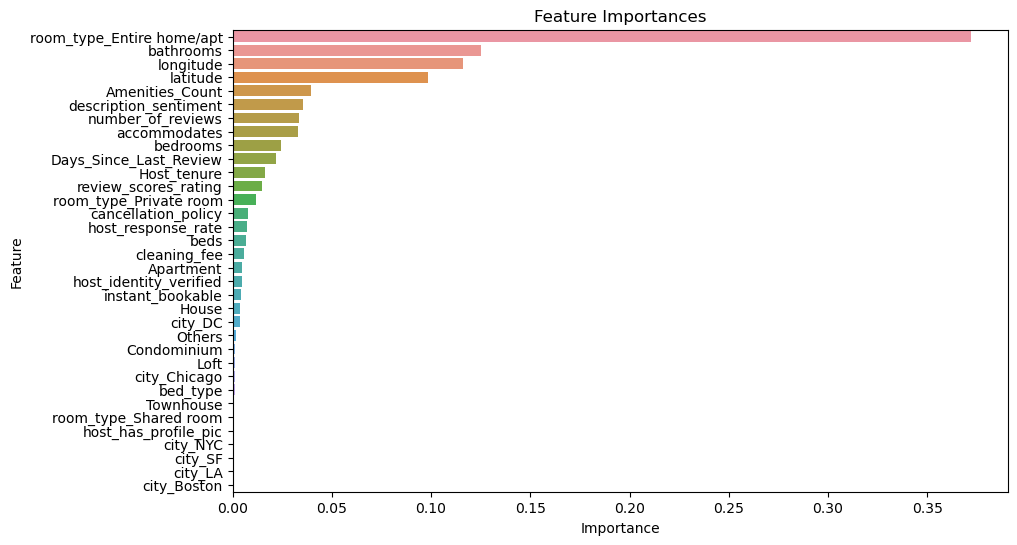

In [117]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor

# Define Random Forest model with best parameters
best_random_forest = RandomForestRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_depth=None, max_features=1.0, random_state=42)

# Fit the Random Forest model with training data
best_random_forest.fit(X_train, y_train)

# Get feature importances from the trained Random Forest model
feature_importances = best_random_forest.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


**Predictive Performance Assessment**

In [122]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = best_random_forest.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Print RMSE and R-squared
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared: {r_squared:.4f}')


Root Mean Squared Error (RMSE): 0.3939
R-squared: 0.6954


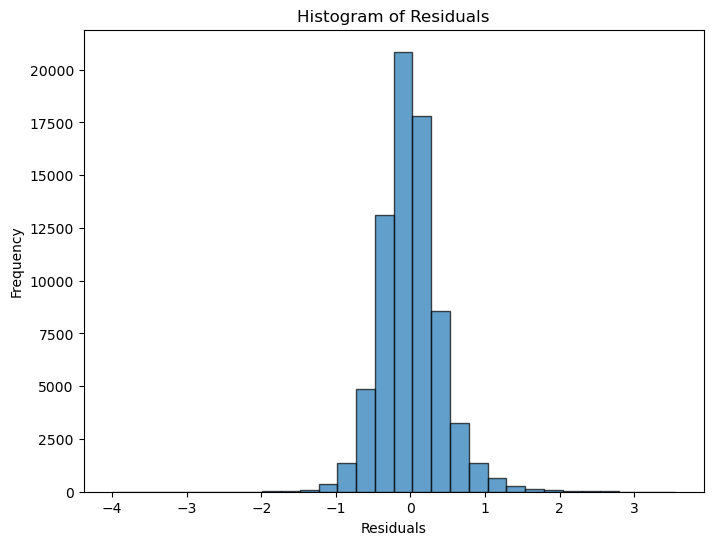

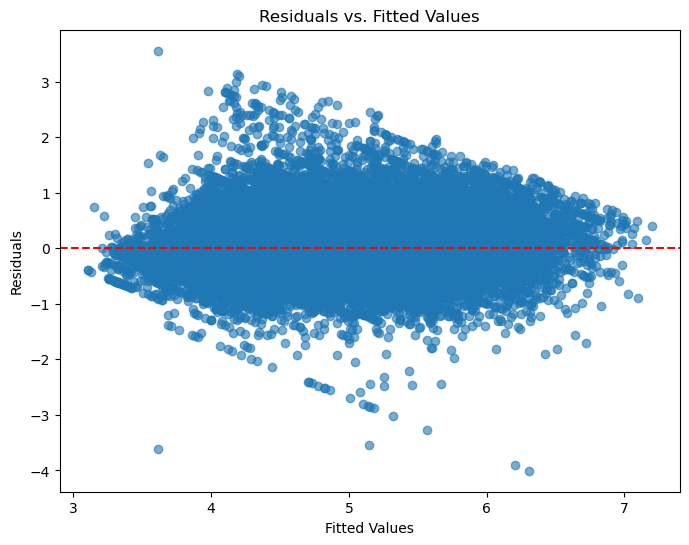

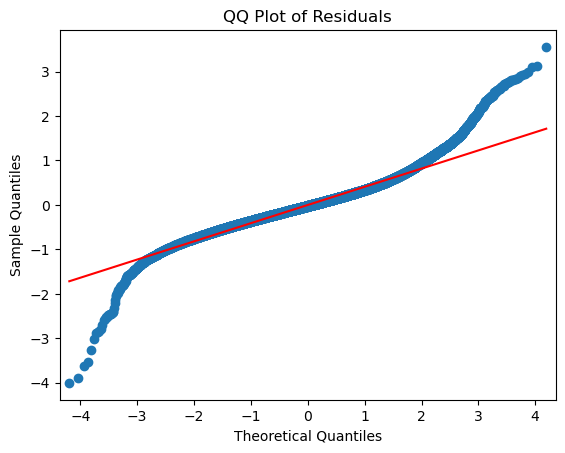

Breusch-Pagan test p-value: 0.0


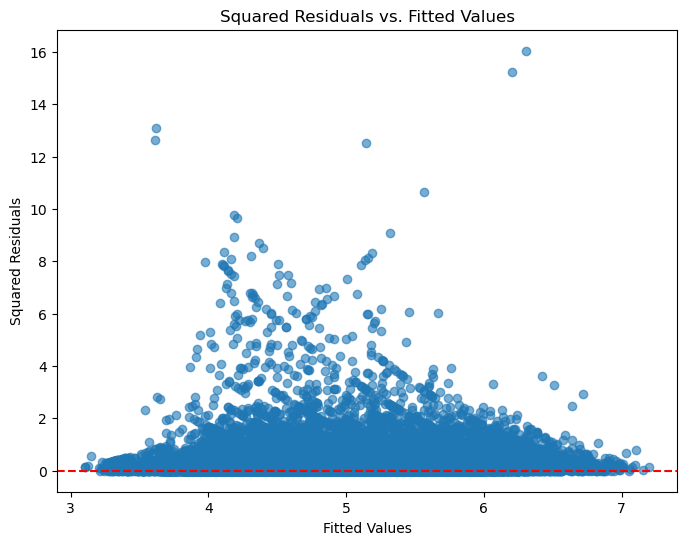

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Assuming you have your model fitted and predictions made already
# model: Your regression model object
# X: Predictor variables
# y: Target variable

# Get predicted values
predicted_values = model.predict(X)

# Calculate residuals
residuals = y - predicted_values

# Plotting histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot residuals vs. fitted values
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Check for normality of residuals
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

# Add constant column to the predictor variables
X_with_constant = sm.add_constant(X)

# Test for homoscedasticity (constant variance of residuals)
bp_test = het_breuschpagan(residuals, X_with_constant)
print("Breusch-Pagan test p-value:", bp_test[1])

# Check for heteroscedasticity visually
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals ** 2, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Squared Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Squared Residuals')
plt.show()


**Final Observation**

1) After the performance of hyperparameter tuning , I've achieved **MSE** score: **0.15522**
2) The **Mean MSE**  is **0.1557** and **
Standard Deviation of MS** is:** 0.002**
3) When room type is **home/apt** have more feature importance which is more than **0.35**
4) The **RMSE** of the best model is **0.3939** and R-squared is **0.6954**
5) The R-squared indicates that approximately 69% of the variance in the dependent variable (listing prices in this case) is explained by the independent variables included in your model. While this R-squared value suggests a relatively good fit.
